# **Latar Belakang**
AWS adalah sebuah perusahaan yang bergerak dibidang penyedia layanan SaaS (*Software as a Service*). Sebagai penyedia layanan berbasis cloud perusahaan melakukan pengelolaan terhadap *platform*, sistem operasi dan perangkat lunak perantara. Model layanan ini berbasis langganan dimana pelanggan dapat menaikkan atau menurunkan layanan sesuai kebutuhan bisnis mereka.

# **Pernyataan Masalah**
Perusahaan ingin melakukan "**Analisis Kinerja Penjualan dan Profitabilitas Berdasarkan Segmen Pelanggan, Produk dan Subregion**". Informasi ini akan membantu perusahaan untuk menetapkan strategi penjualan yang tepat agar kerguian dapat ditekan namun kinerja `Sales` tetap meningkat.

Sebagai seorang *data analyst*, kita diberi tugas untuk menjawab pertanyaan berikut:<br>
**Faktor-faktor apa yang menyebabkan kinerja penjualan dan profitabilitas serta bagaimana strategi untuk menangani berbagai faktor tersebut**

# **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU). 

In [1282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

Dataset ini berisi informasi data transaksi dari sebuah perusahaan penyedia layanan SaaS kepada perusahaan lain (B2B). Pada dataset setiap baris terdapat informasi *transaction/order* (9,994 transaksi), yaitu:

1. Row ID       : Nomer baris dari setiap transaksi.
2. Order ID     : Nomer *unique* dari setiap transaksi.
3. Order Date   : Tanggal pembelian.
4. Date Key     : Tanggal pembelian dengan format (YYYYMMDD).
5. Contact Name : Nama orang yang melakukan pembelian.
6. Country      : Negara tempat pembelian dilakukan.
7. City         : Kota tempat pembelian dilakukan.
8. Region       : Wilayah tempat pembelian dilakukan.
9. Subregion    : Subwilayah tempat pembelian dilakukan.
10. Customer    : Nama Perusahaan yang melakukan pembelian.
11. Customer ID : Nomor ID dari Perusahaan pelanggan.
12. Industry    : Jenis industri dari perusahaan pelanggan.
13. Segment     : Segmen pelanggan (SMB, Strategic, Enterprise, etc.).
14. Product     : Jenis produk yang dibeli.
15. License     : *License key* dari produk yang dibeli.
16. Sales       : Jumlah penjualan dari setiap transaksi.
17. Quantity    : Jumlah produk yang dibeli dari setiap transaksi.
18. Discount    : Diskon yang dikenakan dari setiap transaksi.
19. Profit      : Keuntungan dari setiap transaksi.

Berikut 5 baris teratas dan terbawah dari dataset Saas_Sales.

In [1283]:
df_saas=pd.read_csv('SaaS-Sales.csv')
display(df_saas.head(),df_saas.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset Saas_Sales.

In [1284]:
display(df_saas.info(),df_saas.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

None

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Berdasarkan informasi diatas dapat diketahui bahwa:
1. Terdapat `19` kolom
2. Terdapat `9994` baris
3. Tidak terdapat nilai null pada setiap baris di seluruh kolom
4. `Row ID`, `Customer ID` seharusnya bertipe `object`
5. `Order Date` dan `Date Key` seharusnya bertipe `datetime`

In [1285]:
display(df_saas.describe(include='object'),df_saas.describe())

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [1286]:
pd.set_option('display.max_colwidth', 0)
df_unique=pd.DataFrame(df_saas.nunique()).reset_index().rename(columns={'index':'Column Name',0:'Number of Unique'})
df_unique['Unique Values']=[df_saas[i].unique() for i in df_saas]
display(df_unique,f'Data Duplikat = {df_saas.duplicated().sum()}')

,Column Name,Number of Unique,Unique Values
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

'Data Duplikat = 0'

Secara umum, kita bisa melihat bahwa:
* Kolom `License` dan `Row ID` memiliki jumlah unique yang sama dengan jumlah baris. Selain itu data tidak digunakan dalam analisis sehingga akan dihapus dari dataset.
* Kolom `Order Date` dan `Date Key` berisi data tanggal yang sama hanya saja format penulisan yang berbeda. Sehingga salah satu kolom tersebut yaitu `Date Key` dihapus.
* Kolom `Order ID` berisikan id unik dari setiap transaksi, selain itu data tidak digunakan dalam analisis sehingga akan dihapus dari dataset.
* Kolom `Customer ID` berisikan id unik dari setiap customer, selain itu data tidak digunakan dalam analisis sehingga akan dihapus dari dataset.
* Kolom `Region` berisi 3 data unique dari subwilayah dan tidak relevan jika digunakan dalam analisis maka data akan dihapus dari dataset.
* Kolom `Contact Name` berisi Nama Contact perwakilan perusahaan konsumen.
* Kolom `City` berisi asal Kota tempat melakukan transaksi pembelian.
* Dataset tidak memiliki data duplikat sehingga tidak ada kolom atau baris yang dihapus karena nilai duplikat

In [1287]:
df_clean = df_saas.drop(columns = ['Row ID', 'Order ID', 'Date Key', 'License', 'Region', 'Contact Name', 'City'])
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])
df_clean.head()

,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,2022-06-13,United States,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


In [1288]:
df_clean['Profit Margin'] = ((df_clean['Profit']/df_clean['Sales'])*100).round(2)
df_clean

,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin
0,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,16.00
1,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,30.00
2,2022-06-13,United States,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,47.00
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,-40.00
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2020-01-22,Germany,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,25.2480,3,0.20,4.1028,16.25
9990,2023-02-27,United States,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,91.9600,2,0.00,15.6332,17.00
9991,2023-02-27,United States,NAMER,American Express,1005,Finance,SMB,Site Analytics,258.5760,2,0.20,19.3932,7.50
9992,2023-02-27,United States,NAMER,American Express,1005,Finance,SMB,Support,29.6000,4,0.00,13.3200,45.00


In [1289]:
df_clean['Order Month'] = df_clean['Order Date'].apply(lambda x : str(x)[:7])


df_clean['Order Month'] = pd.to_datetime(df_clean['Order Month'])

display(df_clean.info(),df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Country        9994 non-null   object        
 2   Subregion      9994 non-null   object        
 3   Customer       9994 non-null   object        
 4   Customer ID    9994 non-null   int64         
 5   Industry       9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Product        9994 non-null   object        
 8   Sales          9994 non-null   float64       
 9   Quantity       9994 non-null   int64         
 10  Discount       9994 non-null   float64       
 11  Profit         9994 non-null   float64       
 12  Profit Margin  9994 non-null   float64       
 13  Order Month    9994 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 1.1+

None

,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month
0,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,16.00,2022-11-01
1,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,30.00,2022-11-01
2,2022-06-13,United States,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,47.00,2022-06-01
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,-40.00,2021-10-01
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,11.25,2021-10-01


In [1290]:
df_clean['Order Year'] = df_clean['Order Date'].apply(lambda x : str(x)[:4])


df_clean['Order Year'] = pd.to_datetime(df_clean['Order Year'])

display(df_clean.info(),df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Country        9994 non-null   object        
 2   Subregion      9994 non-null   object        
 3   Customer       9994 non-null   object        
 4   Customer ID    9994 non-null   int64         
 5   Industry       9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Product        9994 non-null   object        
 8   Sales          9994 non-null   float64       
 9   Quantity       9994 non-null   int64         
 10  Discount       9994 non-null   float64       
 11  Profit         9994 non-null   float64       
 12  Profit Margin  9994 non-null   float64       
 13  Order Month    9994 non-null   datetime64[ns]
 14  Order Year     9994 non-null   datetime64[ns]
dtypes: datetime64[ns](3),

None

,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
0,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,16.00,2022-11-01,2022-01-01
1,2022-11-09,Ireland,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,30.00,2022-11-01,2022-01-01
2,2022-06-13,United States,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,47.00,2022-06-01,2022-01-01
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,-40.00,2021-10-01,2021-01-01
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,11.25,2021-10-01,2021-01-01


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [1291]:
listItem = []
for col in df_clean.columns :
    listItem.append([col, df_clean[col].dtype, df_clean[col].isna().sum(),
                    df_clean[col].nunique(), list(df_clean[col].drop_duplicates().sample(2).values)]);

df_clean_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
df_clean_desc

,dataFeatures,dataType,null,unique,uniqueSample
0,Order Date,datetime64[ns],0,1237,"[2021-01-09T00:00:00.000000000, 2021-12-10T00:00:00.000000000]"
1,Country,object,0,48,"[Saudi Arabia, Norway]"
2,Subregion,object,0,12,"[JAPN, NAMER]"
3,Customer,object,0,99,"[Bosch, Honda Motor]"
4,Customer ID,int64,0,99,"[1008, 1092]"
5,Industry,object,0,10,"[Misc, Finance]"
6,Segment,object,0,3,"[SMB, Enterprise]"
7,Product,object,0,14,"[ChatBot Plugin, Marketing Suite]"
8,Sales,float64,0,5825,"[57.96, 23.904]"
9,Quantity,int64,0,14,"[11, 3]"


Sebelum dibersihkan, dataset memiliki 19 kolom dan kolom "Order Date" memiliki type data object. Sejak awal dataset tidak memiliki duplikat maupun missing values, sehingga hanya dilakukan drop pada kolom `Row ID`, `Order ID`, `Date Key`, `License`, `Region`, `City` dan `Contact Name`. Kolom yang dipertimbangkan untuk dihapus merupakan kolom yang tidak terlibat dalam analisa yang akan dilakukan. Saya menambahkan beberapa kolom yang saya anggap akan membantu dalam analysis, yaitu:
1. `Profit Margin` untuk mengetahui persentase selisih dari *Revenue* dan keuntungan atau juga dapat disebut sebagai konversi `Sales` yang menjadi `Profit`.
2. `Order Month` ditambahkan untuk mengetahui kinerja `Sales` dan `Profit` dari waktu ke waktu.
3. `Order Year` untuk mengetahui tren kenaikakn pelanggan setiap tahunnya.

# **Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu faktor apa saja yang berpengaruh terhadap kinerja *sales* dan *profit*. <br>
Pertama kita akan melihat *Descriptive Statistics* dari kolom yang bertipe numerikal maupun kategorikal


In [1292]:
display(df_clean.describe(), df_clean.describe(include='object'))

,Order Date,Customer ID,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994
mean,2022-05-01 00:07:12.259355648,1049.771963,229.858001,3.789574,0.156203,28.656896,12.031390,2022-04-16 08:46:20.868520960,2021-09-21 16:06:49.205523456
min,2020-01-04 00:00:00,1001.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000,2020-01-01 00:00:00,2020-01-01 00:00:00
25%,2021-05-23 00:00:00,1024.000000,17.280000,2.000000,0.000000,1.728750,7.500000,2021-05-01 00:00:00,2021-01-01 00:00:00
50%,2022-06-27 00:00:00,1049.000000,54.490000,3.000000,0.200000,8.666500,27.000000,2022-06-01 00:00:00,2022-01-01 00:00:00
75%,2023-05-15 00:00:00,1076.000000,209.940000,5.000000,0.200000,29.364000,36.250000,2023-05-01 00:00:00,2023-01-01 00:00:00
max,2023-12-31 00:00:00,1101.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000,2023-12-01 00:00:00,2023-01-01 00:00:00
std,NaN,29.719388,623.245101,2.225110,0.206452,234.260108,46.675436,NaN,NaN


,Country,Subregion,Customer,Industry,Segment,Product
count,9994,9994,9994,9994,9994,9994
unique,48,12,99,10,3,14
top,United States,NAMER,Allianz,Finance,SMB,ContactMatcher
freq,2001,2507,192,2127,5191,1842


Berdasarkan ringkasan statistik descriptif untuk kolom numerikal dapat diketahui bahwa terdapat nilai `Sales` sebesar **0.444000** dan `Profit` terendah sebesar **-6599.978000**. 
Hal tersebut perlu kita analisa lebih mendalam untuk mengetahui apa yang menyebabkan *"kerugian"* tersebut.
Pada ringkasan statistik descriptif untuk kolom kategorikal dapat diketahui :<br>
    - Jenis `Product` yang sering muncul merupakan sektor **ContactMatcher**.<br>
    - `Segment` yang sering muncul merupakan sektor **SMB**.<br>
    - `Industry` yang sering muncul merupakan sektor **Finance**.<br>
    - `Customer` yang sering muncul merupakan sektor **Allianz**.<br>
    - `Region` yang sering muncul merupakan sektor **EMEA**.<br>
    - `Country` yang sering muncul merupakan sektor **United States**.

Terdapat beberapa faktor yang dapat kita anggap dapat menyebabkan profit minus (rugi) tersebut. Seperti kinerja sales berdasarkan `Product` pada setiap `Segment` ataupun kecenderungan customer setiap negara untuk membeli `Product` tertentu. Selain itu, penerapan `Discount` juga dapat menyebabkan kinerja `Profit` yang rendah. Untuk mengetahui sumber dari kinerja buruk tersebut mari kita bedah satu persatu.

#### **1. Persentase pelanggan berdasarkan `Segment`**


In [1293]:
df_segment = df_clean.groupby('Segment')[['Product']].count().reset_index().rename(columns={'Product':'Total'})
df_segment['Percentage']=((df_segment['Total']/df_segment['Total'].sum())*100).round(2)
df_segment

,Segment,Total,Percentage
0,Enterprise,1783,17.84
1,SMB,5191,51.94
2,Strategic,3020,30.22


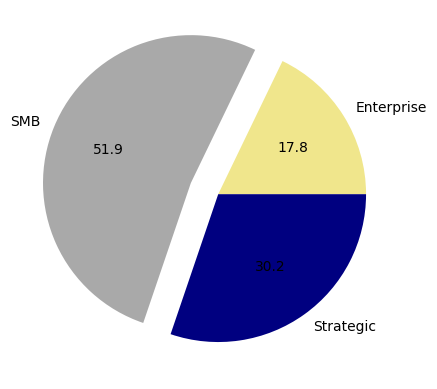

In [1397]:
plt.pie(
    x=df_segment['Percentage'],           
    labels = df_segment['Segment'],     
    autopct = f'%.1f',                        
    explode = [0, 0.2, 0],
    colors = ['khaki', 'darkgrey', 'navy'])
plt.show()

Berdasarkan pie chart dapat diketahui bahwa sebanyak **51.9%** konsumen berasal dari `Segment` **SMB** (*Small to Medium Business*), Artinya lebih dari setengah konsumen berasal dari perusahaan dengan skala bisnis kurang dari 1000 karyawan. Untuk mencari tahu `Segment` mana yang lebih baik dan buruk kinerja penjualannya kita perlu menampilkan tabel dan chart yang membandingkan Kinerja `Sales` dan `Profit` berdasarkan `Segment`.

#### **2. Kinerja `Sales` dan `Profit` berdasarkan `Segment`**

In [1295]:
df_segment_profit = df_clean.groupby(['Segment'])[['Sales', 'Profit']].sum().reset_index().sort_values(['Profit'], ascending=False)
df_segment_profit

,Segment,Sales,Profit
1,SMB,1.161401e+06,134119.2092
2,Strategic,7.061464e+05,91979.1340
0,Enterprise,4.296531e+05,60298.6785


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

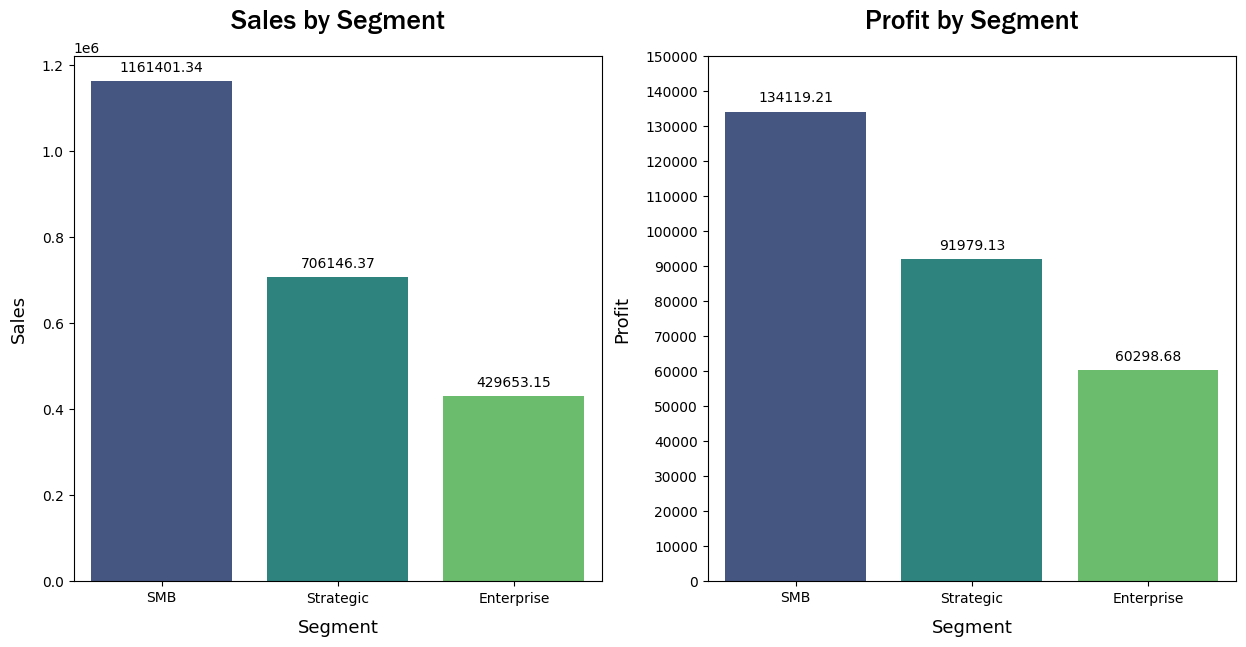

In [1296]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1) 
ax = sns.barplot(data=df_segment_profit, x='Segment', y='Sales',palette="viridis")

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 5)

plt.xlabel('Segment', size = 13, labelpad= 10)
plt.ylabel('Sales', size = 13, labelpad= 10)
plt.title('Sales by Segment', size= 20, pad= 20, fontweight = 'bold',fontname = 'Franklin Gothic Medium')

plt.subplot(2, 2, 2) 
ax = sns.barplot(data=df_segment_profit, x='Segment', y='Profit',palette="viridis")

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 5)

plt.yticks(range(0, 150001, 10000))
plt.xlabel('Segment', size = 13, labelpad= 10)
plt.ylabel('Profit', size = 13, labelpad= 10)
plt.title('Profit by Segment', size= 20, pad= 20, fontweight = 'bold',fontname = 'Franklin Gothic Medium')
plt.show()

Berdasarkan grafik diatas dapat diketahui bahwa `Segment` *SMB (Small to Medium Business)* memberikan kinerja `Sales` dan `Profit` tertinggi. Sejalan dengan analisa sebelumnya yang menyatakan bahwa **51.6%** pelanggan berasal dari `Segment` SMB. Jadi hal tersebut wajar jika `Segment` **SMB** memberikan kinerja yang baik karena secara volume pelanggan merupakan yang terbanyak. Untuk mengetahui faktor yang menyebabkan kinerja profit yang rendah, mari kita kelompokan jenis `Produk` berdasarkan `Segment` serta membandingkan median `Profit Margin` dari setiap `Produk`.

#### **3. `Profit` Berdasarkan Sektor `Industry`**

Sebelum kita analisis lebih mendalam dari tiap segment pelanggan, kita perlu mengetahui apakah sektor `Industry` dari setiap `Segment` memiliki perbedaan dalam segi `Profit` yang diterima dari penjualan. Analisis ini kita perlukan, untuk mengambil langkah selanjutnya dalam menganalisis Faktor yang mempengaruhi kinerja `Profit`.

Pertama kita perlu memastikan distribusi dari data `Sales`, `Profit` dan `Profit Margin` apakah terdistribusi normal secara statistik. 

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


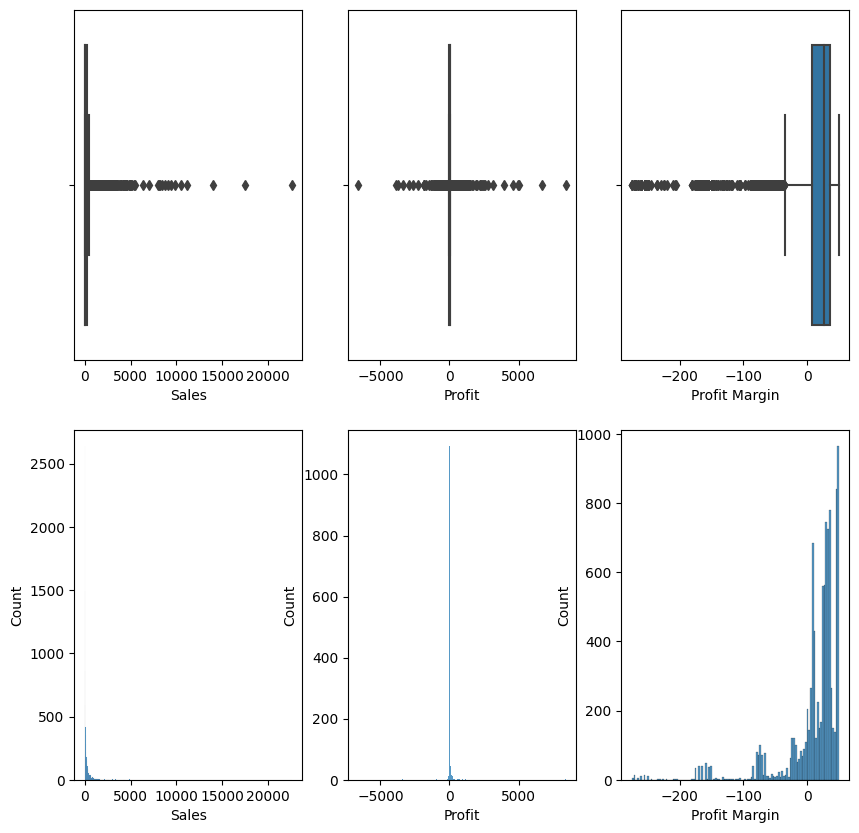

In [1297]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(10,10))

sns.boxplot(data=df_clean, x='Sales', ax=axes[0][0])
sns.boxplot(data=df_clean, x='Profit', ax=axes[0][1])
sns.boxplot(data=df_clean, x='Profit Margin', ax=axes[0][2])
sns.histplot(data=df_clean, x='Sales', ax=axes[1][0])
sns.histplot(data=df_clean, x='Profit', ax=axes[1][1])
sns.histplot(data=df_clean, x='Profit Margin', ax=axes[1][2])

plt.show()

Secara visual distribusi `Sales`, `Profit` dan `Profit Margin` tidak terdistribusi normal. Masing-masing memiliki *Positively Skewed* untuk `Sales` dan `Profit`, serta *Negatively Skewed* untuk `Profit Margin` Untuk menguatkan pernyataan tersebut kita perlu melakukan uji frekuentif/normally test dengan metode D'Agostino & Pearson Test/normaltest

- Normality test untuk `Sales`

In [1298]:
stat, pvalue = normaltest(df_clean['Sales'])
if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


- Normality test untuk `Profit`

In [1299]:
stat, pvalue = normaltest(df_clean['Profit'])
if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


- Normality test untuk `Margin`

In [1300]:
stat, pvalue = normaltest(df_clean['Profit'])
if pvalue > 0.05:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else:
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan bahwa data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan bahwa data TIDAK terdistribusi normal


In [1301]:
df_industry = df_clean.groupby('Industry')[['Sales', 'Profit', 'Profit Margin']].median().reset_index()
df_industry

,Industry,Sales,Profit,Profit Margin
0,Communications,44.128,6.90880,27.00
1,Consumer Products,49.650,7.68000,26.25
2,Energy,49.876,7.61380,27.00
3,Finance,59.904,9.08820,27.00
4,Healthcare,59.520,8.86080,27.00
5,Manufacturing,56.605,8.79255,28.00
6,Misc,58.730,15.18500,29.00
7,Retail,51.795,9.33120,28.00
8,Tech,55.974,8.98300,27.00
9,Transportation,55.992,8.67300,26.00


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Profit by Industry')

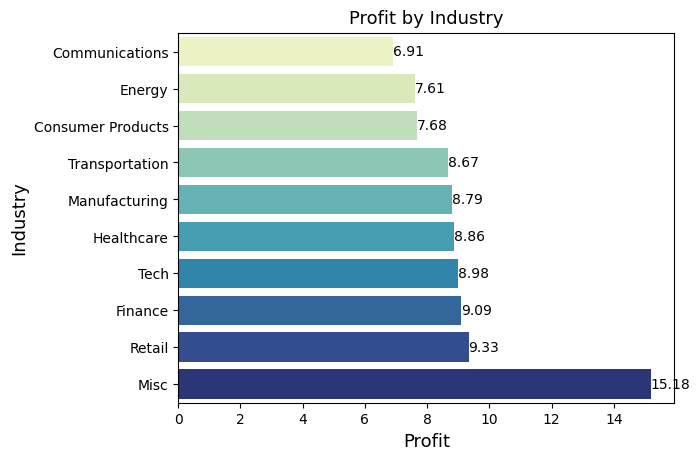

In [1302]:
ax = sns.barplot(data=df_industry.sort_values('Profit'), x='Profit', y='Industry', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.xlabel('Profit', size = 13)
plt.ylabel('Industry', size = 13)
plt.title('Profit by Industry', size= 13, pad = 7)

Berdasarkan visualisasi terlihat bahwa median profit terlihat berbeda terutama untuk sektor Industry lain-lain (*Misc*). Untuk menguji secara statistik apakah median profit dari tiap sektor inustri berbeda signifikan atau tidak, kita akan lakukan uji hipotesis.

Hipotesis :

- Ho : Median Profit untuk setiap sektor `Industry` adalah SAMA
- Ha : Minimal ada 1 sektor `Industry` yang berbeda median Profitnya. Tetapi kita tidak tahu yang mana.

In [1303]:
from scipy.stats import kruskal

In [1304]:
stat, pvalue = kruskal(
    df_industry[df_industry['Industry']=='Communications']['Profit'],
    df_industry[df_industry['Industry']=='Consumer Products']['Profit'],
    df_industry[df_industry['Industry']=='Finance']['Profit'],
    df_industry[df_industry['Industry']=='Healthcare']['Profit'],
    df_industry[df_industry['Industry']=='Manufacturing']['Profit'],
    df_industry[df_industry['Industry']=='Misc']['Profit'], 
    df_industry[df_industry['Industry']=='Retail']['Profit'], 
    df_industry[df_industry['Industry']=='Tech']['Profit'],
    df_industry[df_industry['Industry']=='Transportation']['Profit'],        
)

pvalue

0.43347012036670896

In [1305]:
# conclusion
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 sektor Industry yang berbeda median Profitnya.
    (Mediannya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa minimal ada 1 sektor Industry yang berbeda median Profitnya. Tetapi kita tidak tahu yang mana.
    (Mediannya berbeda signifikan)
    ''')


    pvalue = 0.43347. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa minimal ada 1 sektor Industry yang berbeda median Profitnya.
    (Mediannya TIDAK berbeda signifikan)
    


Berdasarkan uji hipotesis diperoleh kesimpulan bahwa profit yang diberikan dari setiap sektor `Industry` tidak berbeda signifikan. Oleh karena itu kita akan melakukan analisis yang langsung berfokus pada `Product` yang dijual. Apa sajakah faktor-faktor yang mempengaruhi kinerja `Profit` dari setiap `Product`.

#### **4. Median `Profit Margin `berdasarkan `Product` dan `Segment`**

In [1306]:
df_profit_margin = df_clean.groupby(['Segment', 'Product'])[['Sales', 'Profit', 'Profit Margin']].median().reset_index()
df_profit_margin.sort_values(['Segment', 'Profit Margin'])

,Segment,Product,Sales,Profit,Profit Margin
6,Enterprise,Marketing Suite,300.53280,15.69780,7.000
7,Enterprise,Marketing Suite - Gold,146.95700,8.49360,10.000
11,Enterprise,Site Analytics,222.38400,22.94820,10.000
1,Enterprise,Big Ol Database,703.71000,43.19910,13.330
4,Enterprise,Data Smasher,108.46500,22.33560,23.000
5,Enterprise,FinanceHub,113.88800,8.88000,25.000
3,Enterprise,ContactMatcher,33.55800,3.32720,26.000
8,Enterprise,OneView,106.96000,24.35950,27.000
2,Enterprise,ChatBot Plugin,14.09000,3.45340,27.500
9,Enterprise,SaaS Connector Pack,39.96000,8.59140,27.500


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

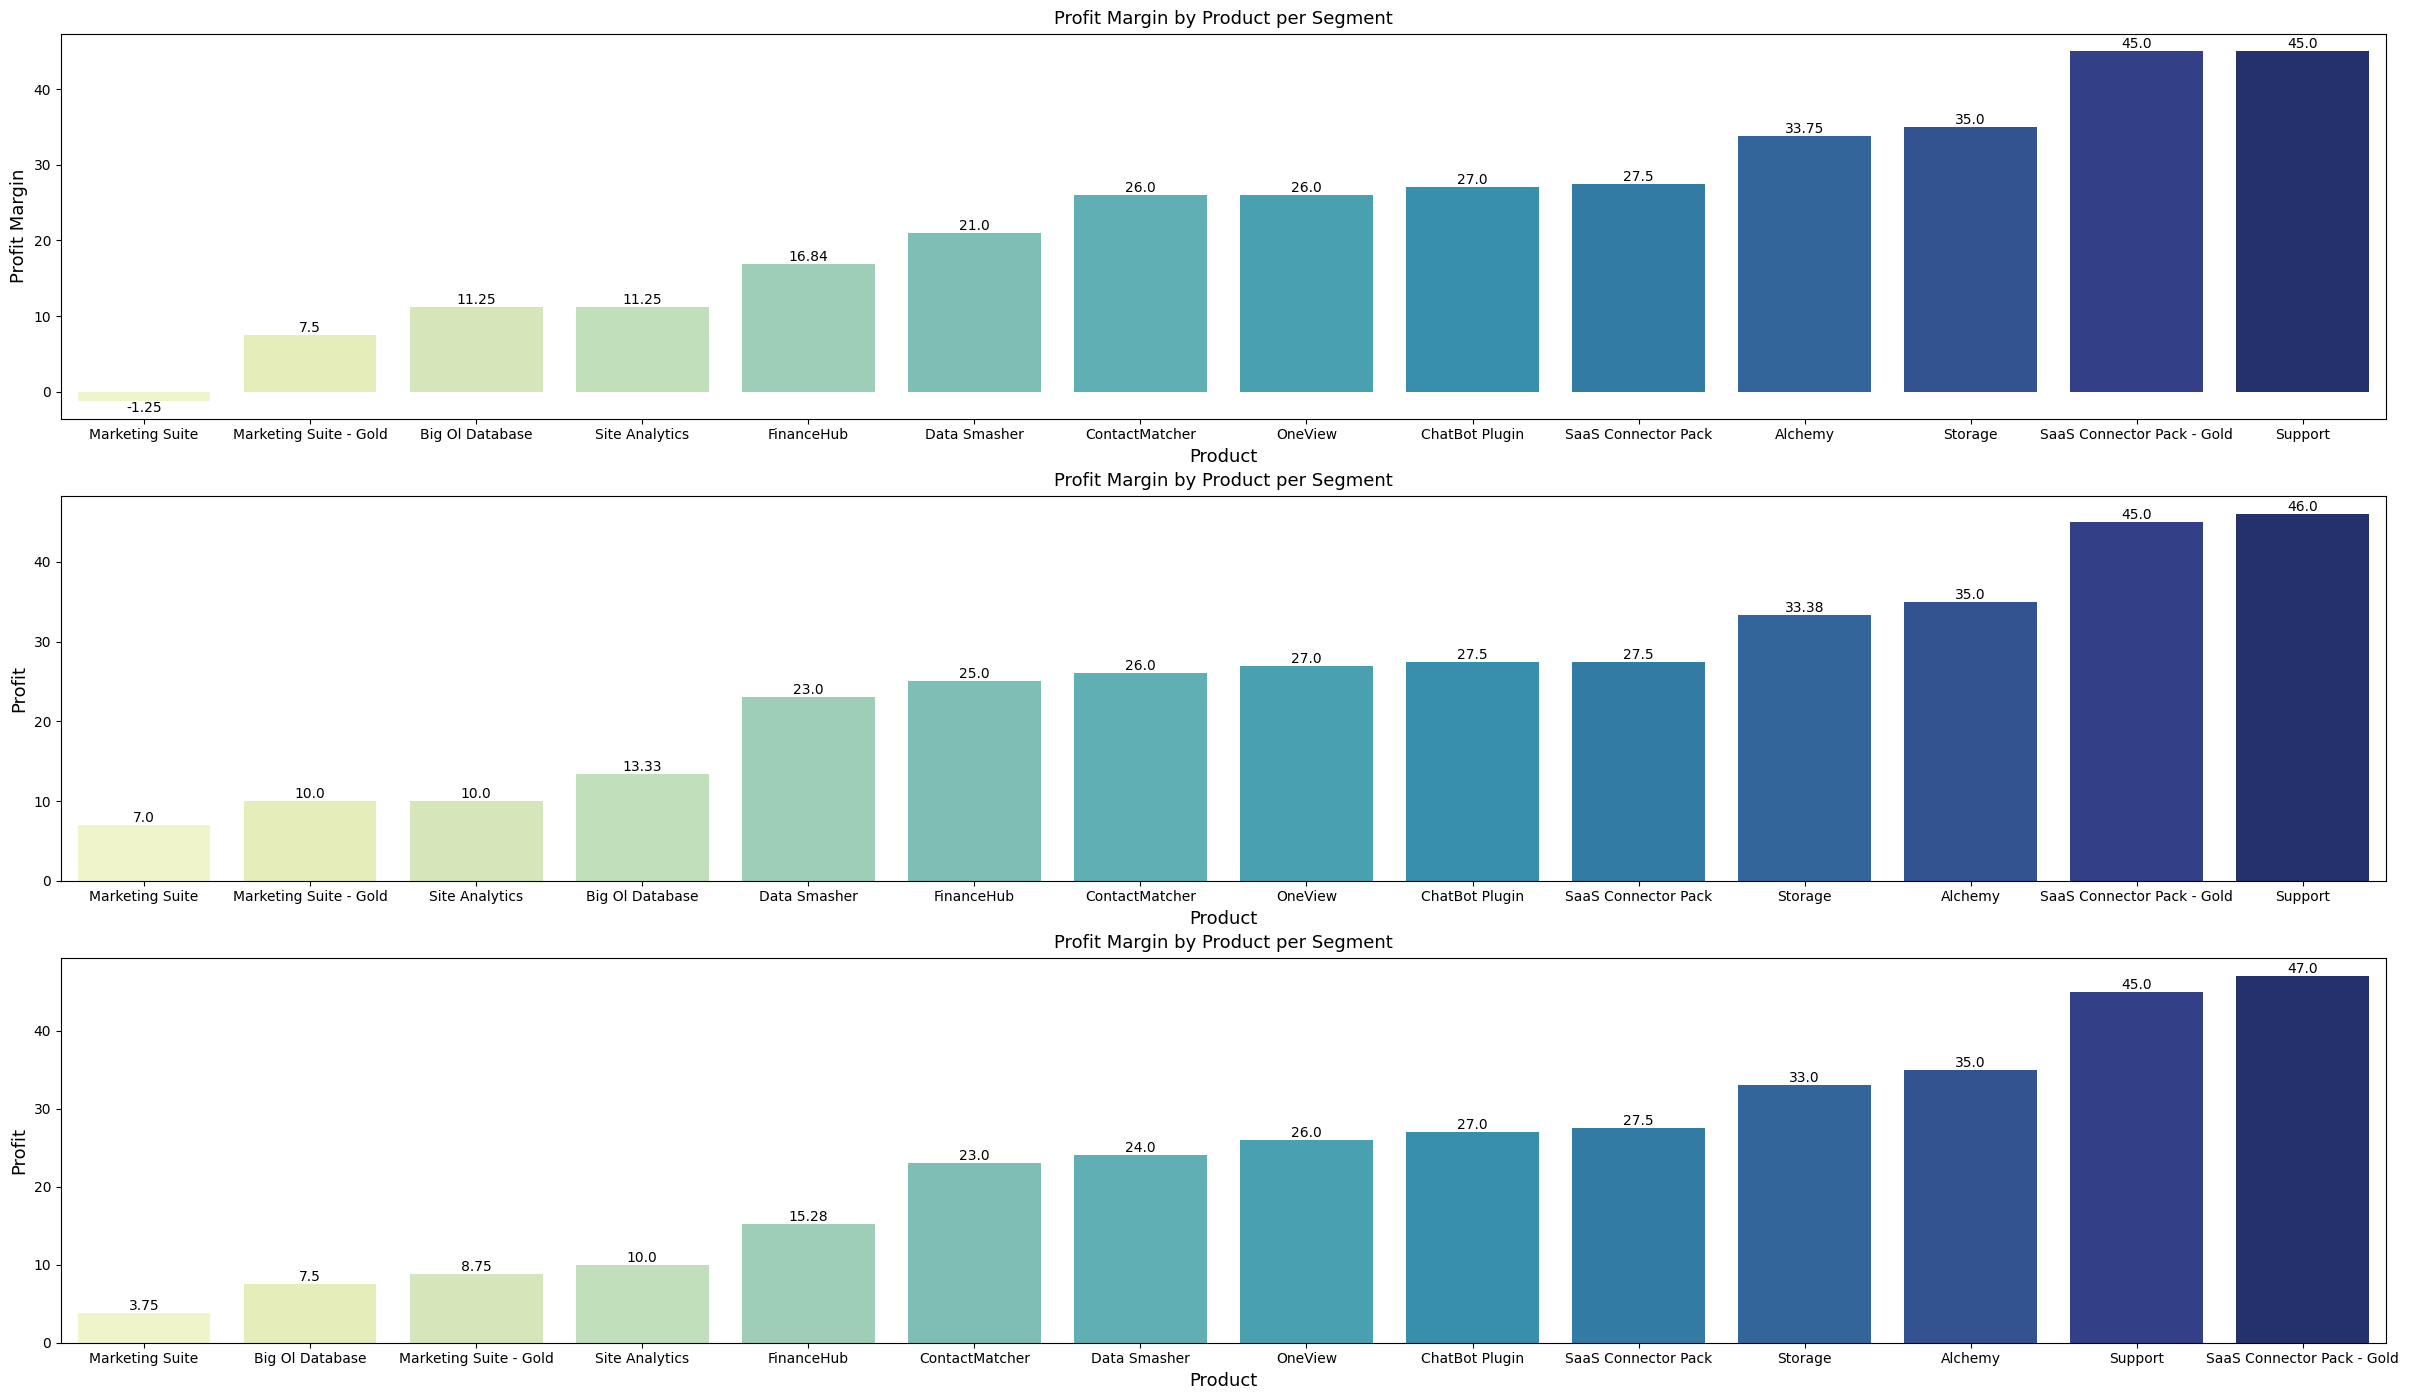

In [1394]:
plt.figure(figsize=(30, 17))

plt.subplot(3,1,1) 
ax = sns.barplot(data=df_profit_margin[df_profit_margin['Segment']=='SMB'].sort_values('Profit Margin'), y='Profit Margin', x='Product', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.ylabel('Profit Margin', size = 13)
plt.xlabel('Product', size = 13)
plt.title('Profit Margin by Product per Segment', size= 13, pad = 7)

plt.subplot(3, 1, 2) 
ax = sns.barplot(data=df_profit_margin[df_profit_margin['Segment']=='Enterprise'].sort_values('Profit Margin'), y='Profit Margin', x='Product', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.ylabel('Profit', size = 13)
plt.xlabel('Product', size = 13)
plt.title('Profit Margin by Product per Segment', size= 13, pad = 7)

plt.subplot(3, 1, 3) 
ax = sns.barplot(data=df_profit_margin[df_profit_margin['Segment']=='Strategic'].sort_values('Profit Margin'), y='Profit Margin', x='Product', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.ylabel('Profit', size = 13)
plt.xlabel('Product', size = 13)
plt.title('Profit Margin by Product per Segment', size= 13, pad = 7)
plt.show()

Berdasarkan sumber yang saya peroleh dari website [berikut](https://www.brex.com/journal/what-is-a-good-profit-margin) standard *rule of thumb* untuk `Profit Margin` adalah diatas 10%. Oleh karena itu kita akan fokus menganalisa setiap `Product` yang memiliki `Profit Margin` dibawah 10%. Setelah kita lakukan filter indexing dengan kondisi `Profit Margin` dibawah 10% didapatkan jenis `Product` dari setiap segment yang dapat menyebabkan kinerja `Profit` rendah. 

Dari tabel diatas dapat diketahui bahwa ada 4 product dengan median kinerja `Profit Margin` rendah, antara lain:
- *Marketing Suite*
- *Marketing Suite - Gold*
- *Big OI Database*
- *Site Analytics*
       
Untuk mengetahui total `Profit` dari setiap `Product`, mari kita lihat apakah secara total sales global dari setiap `Product`.

#### **5. Kinerja `Sales`, `Profit` berdasarkan `Product`**

In [1308]:
df_product = df_clean.groupby('Product')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=True).reset_index()
df_product1 = df_clean.groupby('Product')[['Profit Margin']].median().reset_index()

In [1309]:
df_product=df_product.merge(df_product1).sort_values('Profit Margin').rename(columns={'Profit Margin':'Median Profit Margin'})
df_product

,Product,Sales,Profit,Median Profit Margin
0,Marketing Suite,114879.9963,-3472.5560,1.18
8,Marketing Suite - Gold,223843.6080,21278.8264,8.75
2,Big Ol Database,189238.6310,3384.7569,11.25
12,Site Analytics,330007.0540,44515.7306,11.25
9,FinanceHub,340935.4150,32136.4203,17.78
11,Data Smasher,167380.3180,41936.6357,21.25
5,ContactMatcher,410378.2650,12496.2822,25.00
7,OneView,107532.1610,18138.0054,26.00
3,ChatBot Plugin,27118.7920,6527.7870,27.00
6,SaaS Connector Pack,91705.1640,13059.1436,27.50


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

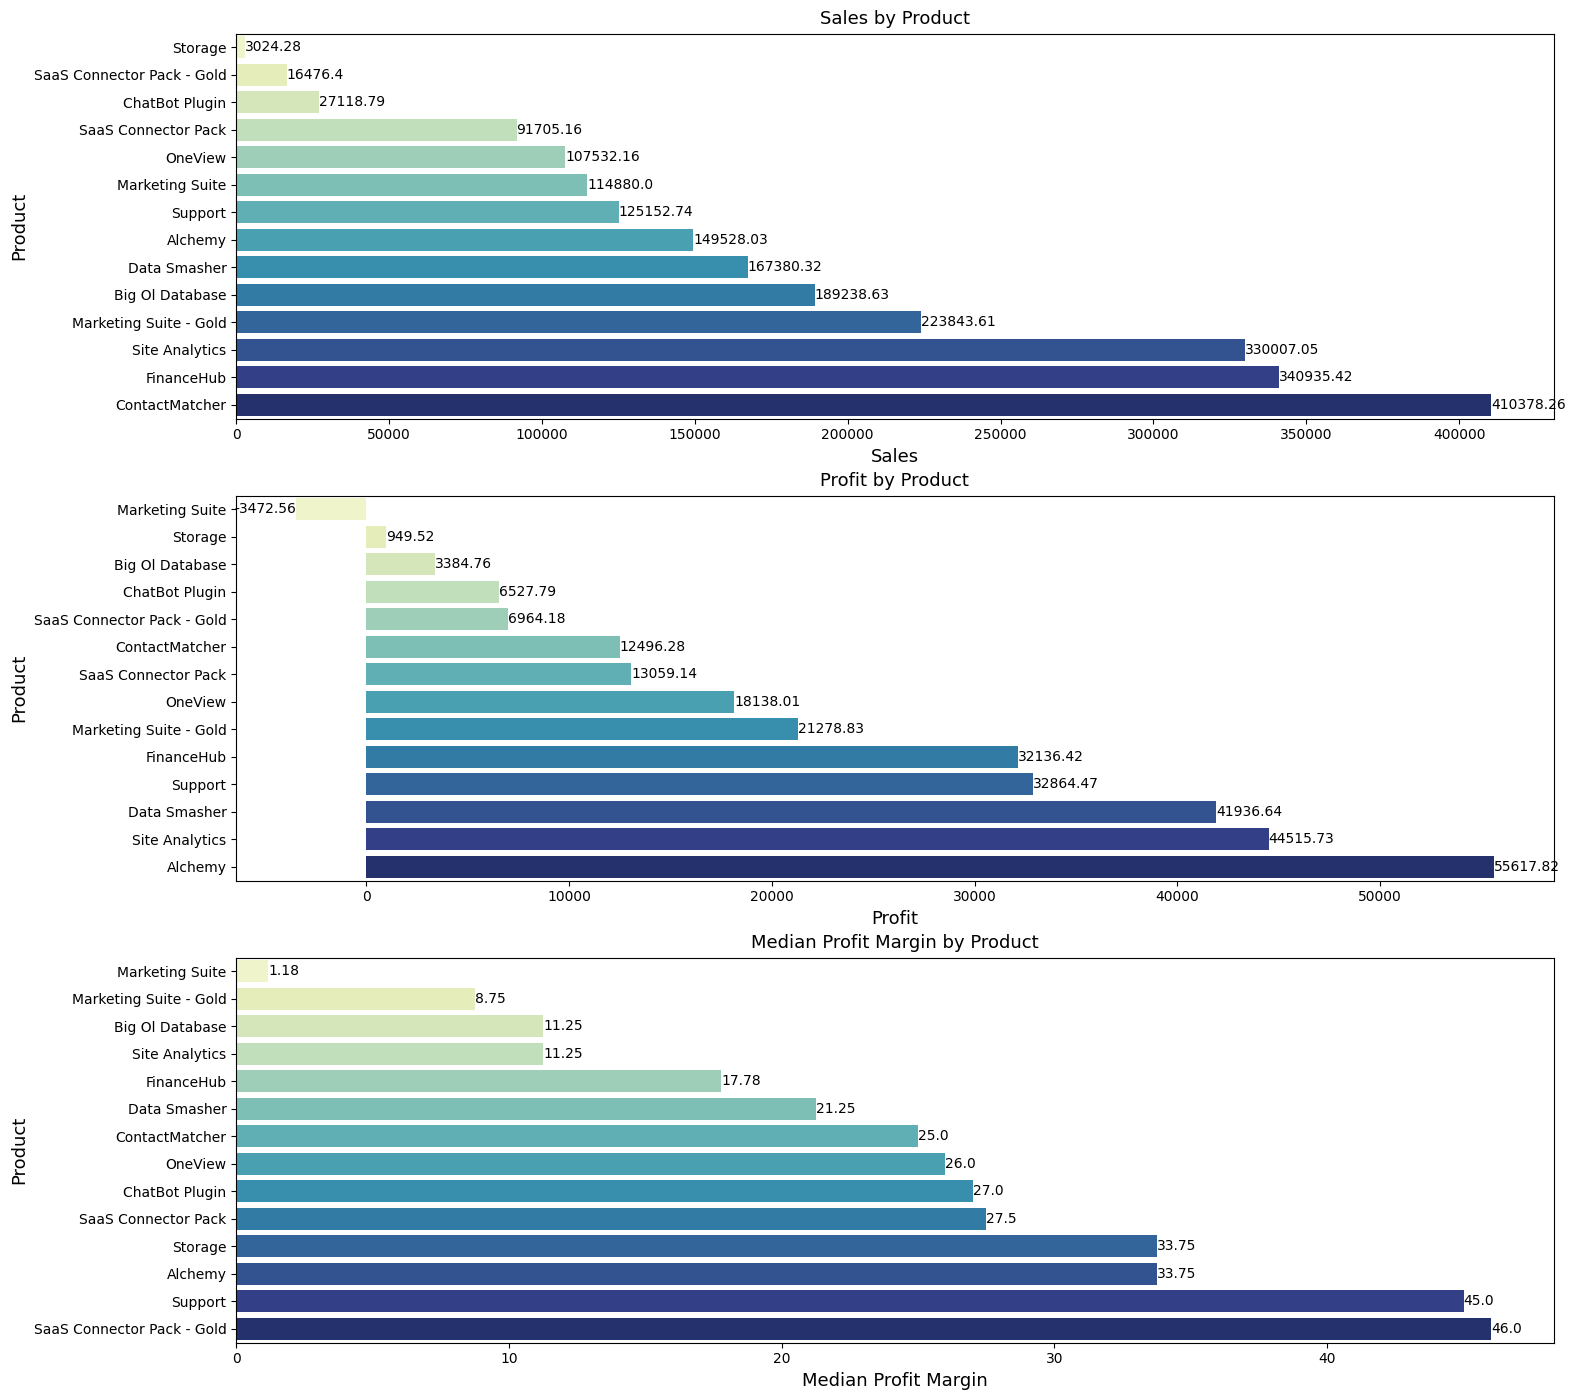

In [1310]:
plt.figure(figsize=(17, 17))

plt.subplot(3,1,1) 
ax = sns.barplot(data=df_product.sort_values('Sales'), x='Sales', y='Product', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.xlabel('Sales', size = 13)
plt.ylabel('Product', size = 13)
plt.title('Sales by Product', size= 13, pad = 7)

plt.subplot(3, 1, 2) 
ax = sns.barplot(data=df_product.sort_values('Profit'), x='Profit', y='Product', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.xlabel('Profit', size = 13)
plt.ylabel('Product', size = 13)
plt.title('Profit by Product', size= 13, pad = 7)

plt.subplot(3, 1, 3) 
ax = sns.barplot(data=df_product.sort_values('Median Profit Margin'), x='Median Profit Margin', y='Product', palette ='YlGnBu')

container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 10)

plt.xlabel('Median Profit Margin', size = 13)
plt.ylabel('Product', size = 13)
plt.title('Median Profit Margin by Product', size= 13, pad = 7)

plt.show()

Berdasarkan analisis Median `Profit` terhadap `Product` dan `Segment` pada nomor sebelumnya kita ketahui bahwa ada 4 `Product` dengan `Profit Margin` dibawah 10%, yaitu:
* Marketing Suite
* Marketing Suite - Gold
* Big OI Database
* Site Analytics

Namun ketika kita melakukan analysis `Sales` dan `Profit` secara *global* diperoleh fakta bahwa 4 product tersebut memiliki kinerja `Sales` yang tidak buruk terutama *Site Analytics*. Tetapi setelah kita visualisasi `Profit Margin` dari global `Sales` 4 `Product` tersebut memang berada di 4 posisi terbawah. Marketing suite memiliki margin terendah, kita harus mempelajari lebih mendalam apa yang menyebabkan `Product` tersebut memiliki margin rendah.

#### **6. `Product` yang sering memberikan `Discount`**

Berdasarkan analysis sebelumnya diperoleh 4 `Product` dengan margin `Profit` paling rendah, kita akan mencari tahu apakah frekuensi pemberian `Discount` mempengaruhi terhadap margin rendah tersebut.

* Frequncy `Discount` terhadap product

In [1311]:
df_total_product = df_clean.groupby('Product')[['Discount']].count().reset_index().rename(columns={'Discount':'Total Product'})
df_total_product =df_total_product

In [1312]:
df_disc_percentage = df_clean[df_clean['Discount']>0].groupby(['Product'])[['Discount']].count()
df_disc_percentage = df_disc_percentage.reset_index().rename(columns={'Discount':'Frekuensi Discount'}).sort_values('Frekuensi Discount', ascending=False)
df_disc_percentage = df_disc_percentage

In [1313]:
df_disc_percentage = df_total_product.merge(df_disc_percentage)
df_disc_percentage['Frekuensi Discount (%)'] = ((df_disc_percentage['Frekuensi Discount']/df_disc_percentage['Total Product'])*100).round(2)
df_disc_percentage = df_disc_percentage.sort_values('Frekuensi Discount (%)', ascending=False)
df_disc_percentage

,Product,Total Product,Frekuensi Discount,Frekuensi Discount (%)
3,ContactMatcher,1842,1433,77.80
1,Big Ol Database,115,86,74.78
6,Marketing Suite,228,168,73.68
0,Alchemy,68,46,67.65
11,Site Analytics,889,578,65.02
5,FinanceHub,981,609,62.08
8,OneView,466,195,41.85
12,Storage,217,89,41.01
9,SaaS Connector Pack,957,386,40.33
10,SaaS Connector Pack - Gold,254,102,40.16


* Korelasi `Discount` terhadap `Profit` dan `Profit Margin`

In [1314]:
corr = df_clean[df_clean['Product']=='Marketing Suite'].corr(numeric_only=True)
corr

,Customer ID,Sales,Quantity,Discount,Profit,Profit Margin
Customer ID,1.000000,0.005779,-0.005686,0.112047,-0.124559,-0.096043
Sales,0.005779,1.000000,0.484709,-0.124170,0.132312,0.162711
Quantity,-0.005686,0.484709,1.000000,0.119935,-0.080579,-0.100789
Discount,0.112047,-0.124170,0.119935,1.000000,-0.607067,-0.905897
Profit,-0.124559,0.132312,-0.080579,-0.607067,1.000000,0.553356
Profit Margin,-0.096043,0.162711,-0.100789,-0.905897,0.553356,1.000000


In [1315]:
matriks = np.triu(corr)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


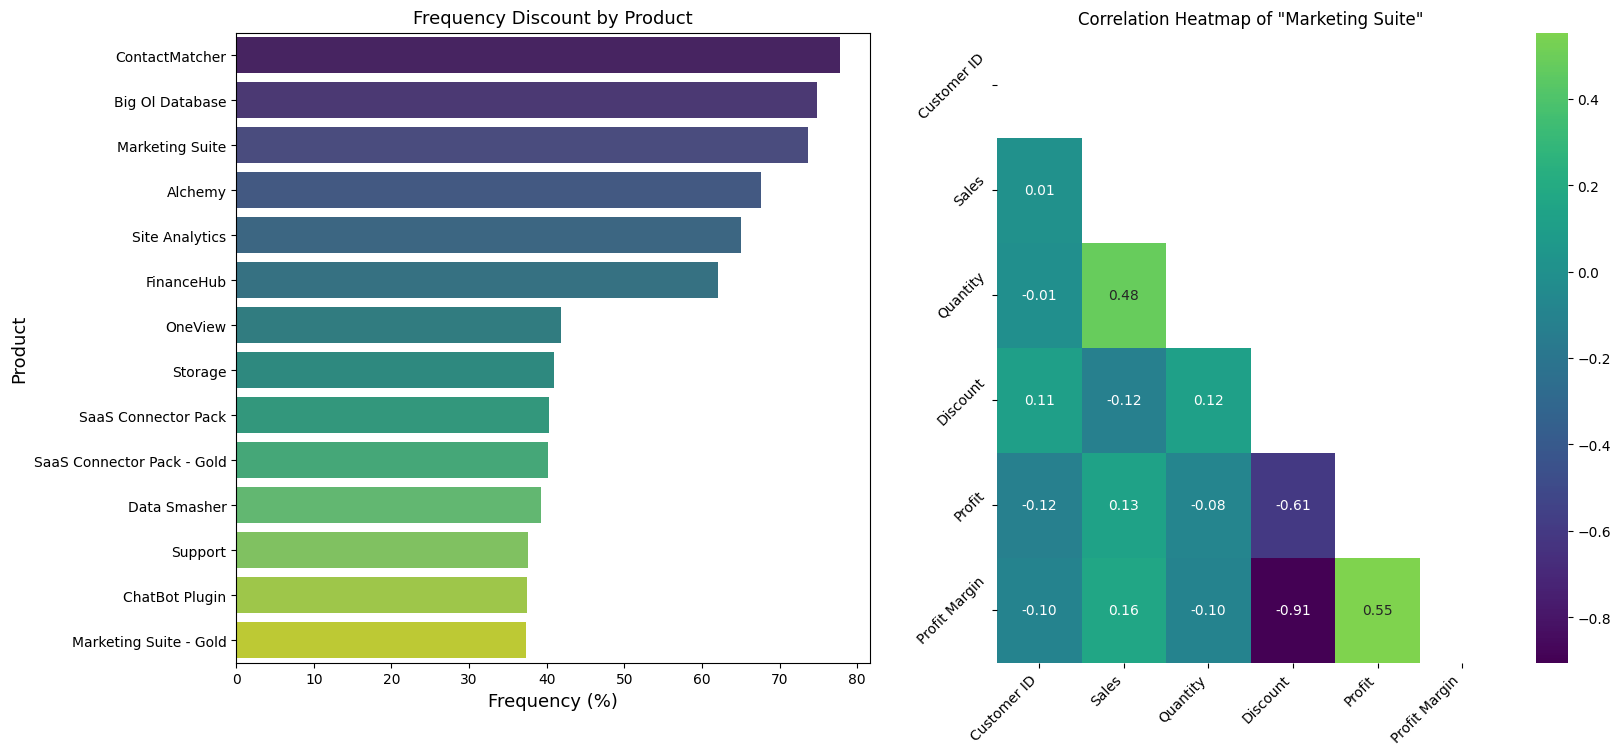

In [1316]:
plt.figure(figsize=(18, 18))

plt.subplot(2,2,1) 
sns.barplot(data=df_disc_percentage, x='Frekuensi Discount (%)', y="Product", palette='viridis')
plt.ylabel('Product', size = 13)
plt.xlabel('Frequency (%)', size = 13)
plt.title('Frequency Discount by Product', size= 13, pad = 7)

plt.subplot(2,2,2) 
heatmap = sns.heatmap(
    data = corr,
    annot = True,                
    fmt = '.2f',             
    cmap = 'viridis',     
    center = 0, 
    mask = matriks   
)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Heatmap of "Marketing Suite"')
plt.show()

Berdasarkan visualisasi diatas diperoleh fakta bahwa:
- 3 jenis `Product` dengan margin profit terendah, yaitu *Marketing Suite*, *Big OI Database* dan *Site Analytics* memiliki frequency pemberian `Discount` diatas 60%.
- *ContactMatcher* memiliki frequency terbanyak dalam pemberian *Discount*. 
- Hubungan antara *Discount* dengan *Profit* menunjukan adanya korelasi yang moderate **-0.61**. Artinya Semakin besar `Discount` yang diberikan semakin kecil `Profit` yang diterima
- Hubungan antara *Discount* dengan *Profit Margin* menunjukan adanya korelasi yang *strong* **-0.91**. Artinya semakin tinggi diskon yang diberikan semakin rendah *Profit* dari `Product` *Marketing Suite* yang terjual.

#### **7. Frekunsi pemberian `Discount` setiap `Product` berdasarkan besaran yang diberikan**

Sebelumnya kita telah melakukan analisa terkait Frekuensi diskon yang diberikan dari setiap `Product`. Diperoleh fakta bahwa terdapat beberapa `Product` yang sering memberikan `Discount` namun secara profit margin tidak termasuk yang terendah atau dibawah 10%.
Untuk memastikan fakta tersebut kita akan membuat perbandingan frekuensi terhadap besaran diskon yang diberikan. Kita akan mengambil masing-masing 2 Produk dari setiap kelompok margin profit (*lower*, *midle*, *top*) untuk membandingkan besaran diskon yang diberikan.<br><br>
    - *lower margin* = Marketing Suite & Site Analytics <br>
    - *midle margin* = OneView & ContactMatcher <br>
    - *top margin* = SaaS Connector Pack - Gold	 & Alchemy <br>

In [1317]:
df_total_product = df_clean.groupby(['Product'])[['Industry']].count().reset_index().rename(columns={'Industry':'Total Product'})
df_total_product =df_total_product

In [1318]:
df_prod_disc_freq = df_clean.groupby(['Product','Discount'])[['Industry']].count()
df_prod_disc_freq = df_prod_disc_freq.reset_index()
df_prod_disc_freq = df_prod_disc_freq

In [1319]:
df_prod_disc_freq = df_prod_disc_freq.merge(df_total_product, how='inner', on = 'Product')
df_prod_disc_freq = df_prod_disc_freq.rename(columns={'Industry':'Frequency Discount'}).sort_values('Product')

In [1320]:
df_prod_disc_freq['Freq Discount (%)'] = ((df_prod_disc_freq['Frequency Discount']/df_prod_disc_freq['Total Product'])*100).round(2)
df_prod_disc_freq.sort_values(['Product', 'Discount'],ascending=True)

,Product,Discount,Frequency Discount,Total Product,Freq Discount (%)
0,Alchemy,0.00,22,68,32.35
1,Alchemy,0.20,37,68,54.41
2,Alchemy,0.40,9,68,13.24
3,Big Ol Database,0.00,29,115,25.22
4,Big Ol Database,0.10,2,115,1.74
5,Big Ol Database,0.20,31,115,26.96
6,Big Ol Database,0.30,5,115,4.35
7,Big Ol Database,0.40,13,115,11.30
8,Big Ol Database,0.50,12,115,10.43
9,Big Ol Database,0.70,23,115,20.00


In [1321]:
disc_freq = df_prod_disc_freq[(df_prod_disc_freq['Product']=='Marketing Suite')|(df_prod_disc_freq['Product']=='Site Analytics')|(df_prod_disc_freq['Product']=='OneView')|(df_prod_disc_freq['Product']=='ContactMatcher')|(df_prod_disc_freq['Product']=='SaaS Connector Pack - Gold')|(df_prod_disc_freq['Product']=='Alchemy')]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\2511948218.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=disc_freq, x='Product', y='Freq Discount (%)', hue='Discount', ci=0, palette='mako')
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

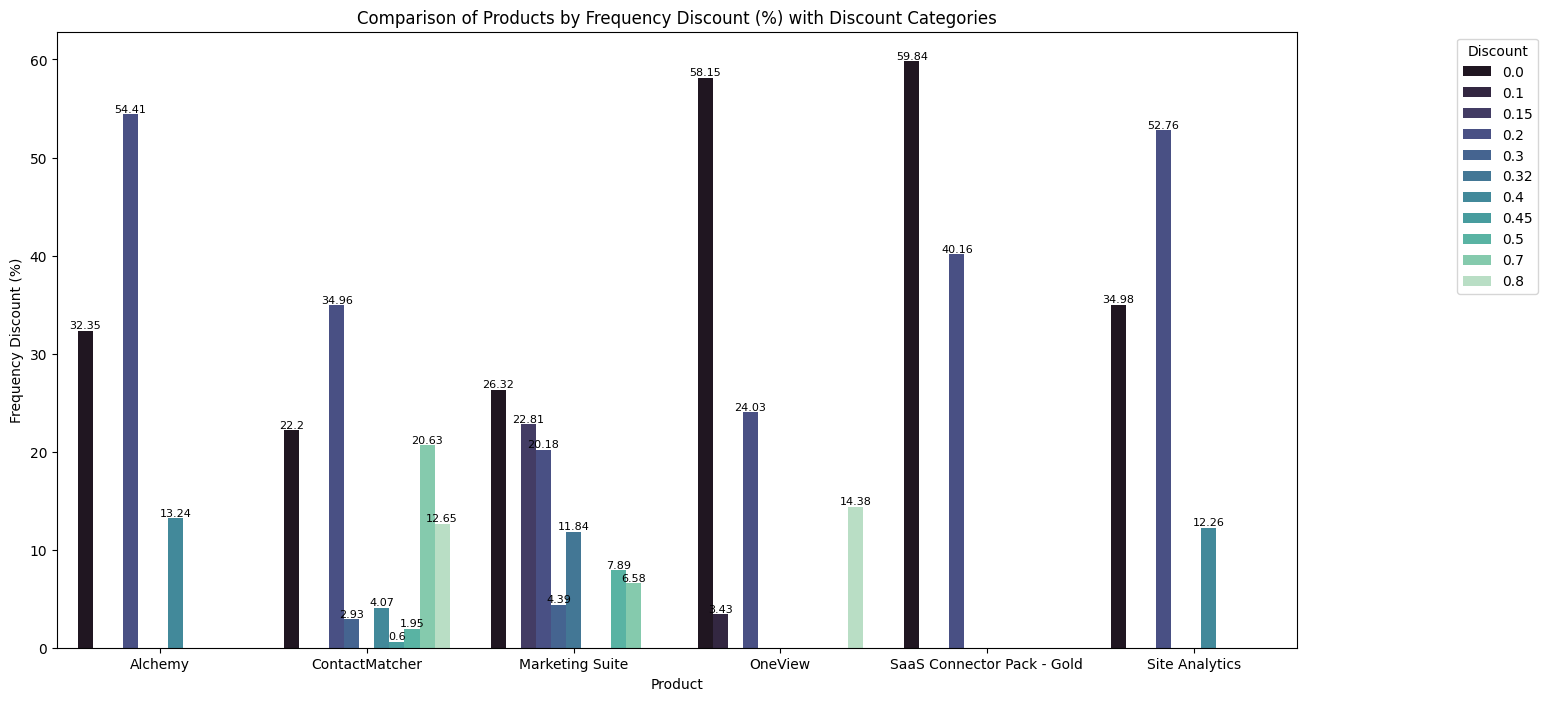

In [1322]:
plt.figure(figsize=(16,8))

ax = sns.barplot(data=disc_freq, x='Product', y='Freq Discount (%)', hue='Discount', ci=0, palette='mako')
for i in range(11):
    container = ax.containers[i]
    ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 8)
plt.xlabel('Product')
plt.ylabel('Frequency Discount (%)')
plt.title('Comparison of Products by Frequency Discount (%) with Discount Categories')
plt.legend(title='Discount', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Lower Margin**
    
    - Marketing Suite :
      - Lebih dari 20.18 % penjualan dikenakan diskon 20%
      - Kurang lebih 30% penjualan dikenakan diskon diatas 30 %
      - Sebanyak 22.81% penjualan dikenakan diskon 15 %
      - Hanya 26.32 % penjualan yang tidak dikenakan diskon (0%)
    - Site Analytics  :
      - 65.02 % penjualan dikenakan diskon diatas 20%
      - 34.98% penjualan tidak dikenakan diskon (0%)
**midle margin**

    - OneView         :
      - Sebanyak 58.15% penjualan tidak dikenakan diskon (0%)
      - Sebanyak 24.03% penjualan dikenakan diskon 20%
      - Sebanyak 14.38 % penjualan dikenakan diskon 80%.
    - ContactMatcher  :
      - Kurang dari 50% penjualan dikenakan diskon diatas 20%
      - Hanya 22.2% penjualan yang tidak dikenakan diskon (0%)
      - Mayoritas penjualan (57%) dikenakan diskon dibawah 20%. Walaupun produk sering memberikan diskon, mayoritas diskon yang diberikan masih mampu menahan median profit margin 25%.
  
**top margin**

    - SaaS Connector Pack - Gold :
      - Sebanyak 59.84% penjualan tidak diberikan diskon (0%)
      - 40.16% penjualan dikenakan diskon namun hanya diangka maksimal 20%
    - Alchemy                    :
      - 32.35% penjualan tidak dikenakan diskon (0%)
      - 54.41% penjualan dikenakan diskon maks 20%
      - 13.24% penjualan dikenakan diskon maks 40%

Berdasarkan analisis ini terlihat bahwa frekuensi pemberian profit pada tiap kelompok memiliki pola yang berbeda-beda. Kelompok lower dan midle lebih sering memberikan diskon sebanyak lebih dari 20%. Sedangkan pada kelompok top margin lebih jarang memberikan diskon (0%). Dari analisis tersebut ada pola yang bisa kita perhatikan, ketika suatu produk semakin sering memberikan diskon diatas 20% semakin turun Profit Marginnya. Analisis ini belum memberikan jawaban yang kuat mengenai pengaruh diskon terhadap Profit. Kita perlu membandingkan median diskon terhadap profit pada setiap produk.

#### **8. Median `Profit` terhadap `Discount`**

- Median Profit by Discount of All Product

In [1323]:
med_disc = df_clean.groupby(['Discount'])[['Profit']].median().reset_index()

- Median Profit by Discount of Marketing Suite

In [1324]:
MarketingSuite = df_clean[df_clean['Product']=='Marketing Suite'].groupby(['Discount'])[['Profit']].median().reset_index()

- Median Profit by Discount of ContactMatcher

In [1325]:
ContactMatcher = df_clean[df_clean['Product']=='ContactMatcher'].groupby(['Discount'])[['Profit']].median().reset_index()
ContactMatcher

,Discount,Profit
0,0.00,21.44520
1,0.20,8.99640
2,0.30,-46.17615
3,0.40,-120.05080
4,0.45,-167.31840
5,0.50,-187.20840
6,0.70,-7.73100
7,0.80,-11.02080


- Median Profit by Discount of Alchemy

In [1326]:
Alchemy = df_clean[df_clean['Product']=='Alchemy'].groupby(['Discount'])[['Profit']].median().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\1940691111.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=med_disc, x='Discount', y='Profit', ci=0, palette='mako')
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future vers

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\1940691111.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=MarketingSuite, x='Discount', y='Profit', ci=0, palette='mako')
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

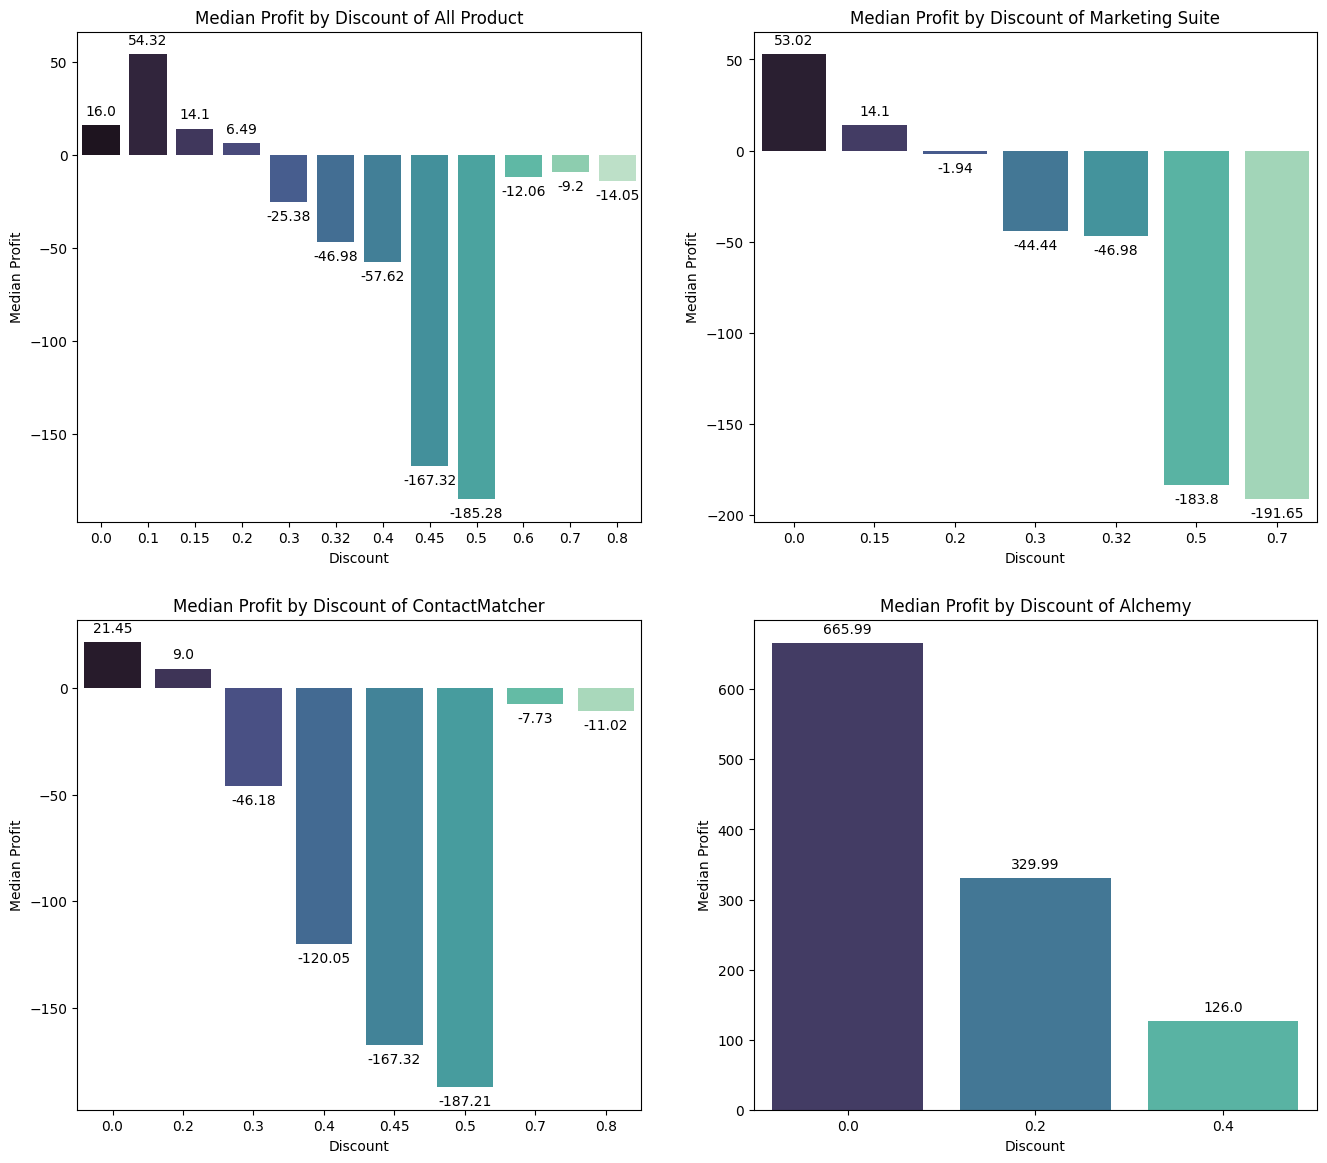

In [1396]:
plt.figure(figsize=(16,14))

plt.subplot(2,2,1)
ax = sns.barplot(data=med_disc, x='Discount', y='Profit', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 5)
plt.xlabel('Discount')
plt.ylabel('Median Profit')
plt.title('Median Profit by Discount of All Product')

plt.subplot(2,2,2)
ax = sns.barplot(data=MarketingSuite, x='Discount', y='Profit', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 5)
plt.xlabel('Discount')
plt.ylabel('Median Profit')
plt.title('Median Profit by Discount of Marketing Suite')

plt.subplot(2,2,3)
ax = sns.barplot(data=ContactMatcher, x='Discount', y='Profit', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 5)
plt.xlabel('Discount')
plt.ylabel('Median Profit')
plt.title('Median Profit by Discount of ContactMatcher')

plt.subplot(2,2,4)
ax = sns.barplot(data=Alchemy, x='Discount', y='Profit', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 5)
plt.xlabel('Discount')
plt.ylabel('Median Profit')
plt.title('Median Profit by Discount of Alchemy')
plt.show()

Berdasarkan visualisasi perbandingan `Discount` terhadap median `Profit` terlihat ketika produk dijual dengan pemberian diskon diatas **20%** profit margin menjadi minus. Walaupun ada beberapa produk seperti Alchemy tetap memberikan profit yang baik ketika memberikan diskon **40%** dan Contact matcher yang nilai ruginya menurun ketika memberikan diskon diatas **70%**. Hal tersebut dapat kita kaitkan dengan penjelasan pada latar belakang bahwa Saas menjual produknya dengan metode langganan dimana pelanggan dapat menaikkan atau menurunkan layanan sesuai kebutuhan bisnis mereka. Artinya harga dapat berbeda-beda pada produk yang sama tergantung dari seberapa banyak layanan yang dibeli. Selain itu, kita tidak mengetahui beban cost dari setiap produk. Harga cost dari setiap produk dapat bervariasi tergantung dari kerumitan dari *engineering* dan *maintenance* setiap produk.

#### **9. Tren Pertumbuhan `Sales` berdasarkan `Order Month`**

In [1328]:
df_time = df_clean.groupby('Order Month')[['Sales', 'Profit']].median().reset_index()

In [1329]:
df_decrease=df_clean[(df_clean['Order Month']=='2021-04-01')|(df_clean['Order Month']=='2021-03-01')|(df_clean['Order Month']=='2021-05-01')].groupby(['Order Month'])[['Sales', 'Profit']].sum().sort_values(['Order Month']).reset_index()

In [1330]:
df_decrease1=df_clean[(df_clean['Order Month']=='2021-04-01')|(df_clean['Order Month']=='2021-03-01')|(df_clean['Order Month']=='2021-05-01')].groupby(['Order Month'])[['Profit Margin', 'Discount']].mean().sort_values(['Order Month']).reset_index()

In [1331]:
df_decrease=df_decrease.merge(df_decrease1)
df_decrease

,Order Month,Sales,Profit,Profit Margin,Discount
0,2021-03-01,38726.2520,9732.0978,14.457464,0.140145
1,2021-04-01,34195.2085,4187.4962,3.767813,0.175938
2,2021-05-01,30131.6865,4667.8690,10.718767,0.166096


In [1332]:
df_decrease2=df_clean[(df_clean['Order Month']=='2021-06-01')|(df_clean['Order Month']=='2021-07-01')|(df_clean['Order Month']=='2021-08-01')].groupby(['Order Month'])[['Sales', 'Profit']].sum().sort_values(['Order Month']).reset_index()

In [1333]:
df_decrease3=df_clean[(df_clean['Order Month']=='2021-06-01')|(df_clean['Order Month']=='2021-07-01')|(df_clean['Order Month']=='2021-08-01')].groupby(['Order Month'])[['Profit Margin', 'Discount']].mean().sort_values(['Order Month']).reset_index()

In [1334]:
df_decrease2=df_decrease2.merge(df_decrease3)
df_decrease2

,Order Month,Sales,Profit,Profit Margin,Discount
0,2021-06-01,24797.2920,3335.5572,12.233913,0.172464
1,2021-07-01,28765.3250,3288.6483,9.149786,0.170357
2,2021-08-01,36898.3322,5355.8084,11.483585,0.156415


In [1335]:
df_decrease= pd.concat([df_decrease, df_decrease2],axis=0)
df_decrease

,Order Month,Sales,Profit,Profit Margin,Discount
0,2021-03-01,38726.2520,9732.0978,14.457464,0.140145
1,2021-04-01,34195.2085,4187.4962,3.767813,0.175938
2,2021-05-01,30131.6865,4667.8690,10.718767,0.166096
0,2021-06-01,24797.2920,3335.5572,12.233913,0.172464
1,2021-07-01,28765.3250,3288.6483,9.149786,0.170357
2,2021-08-01,36898.3322,5355.8084,11.483585,0.156415


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\4024069869.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

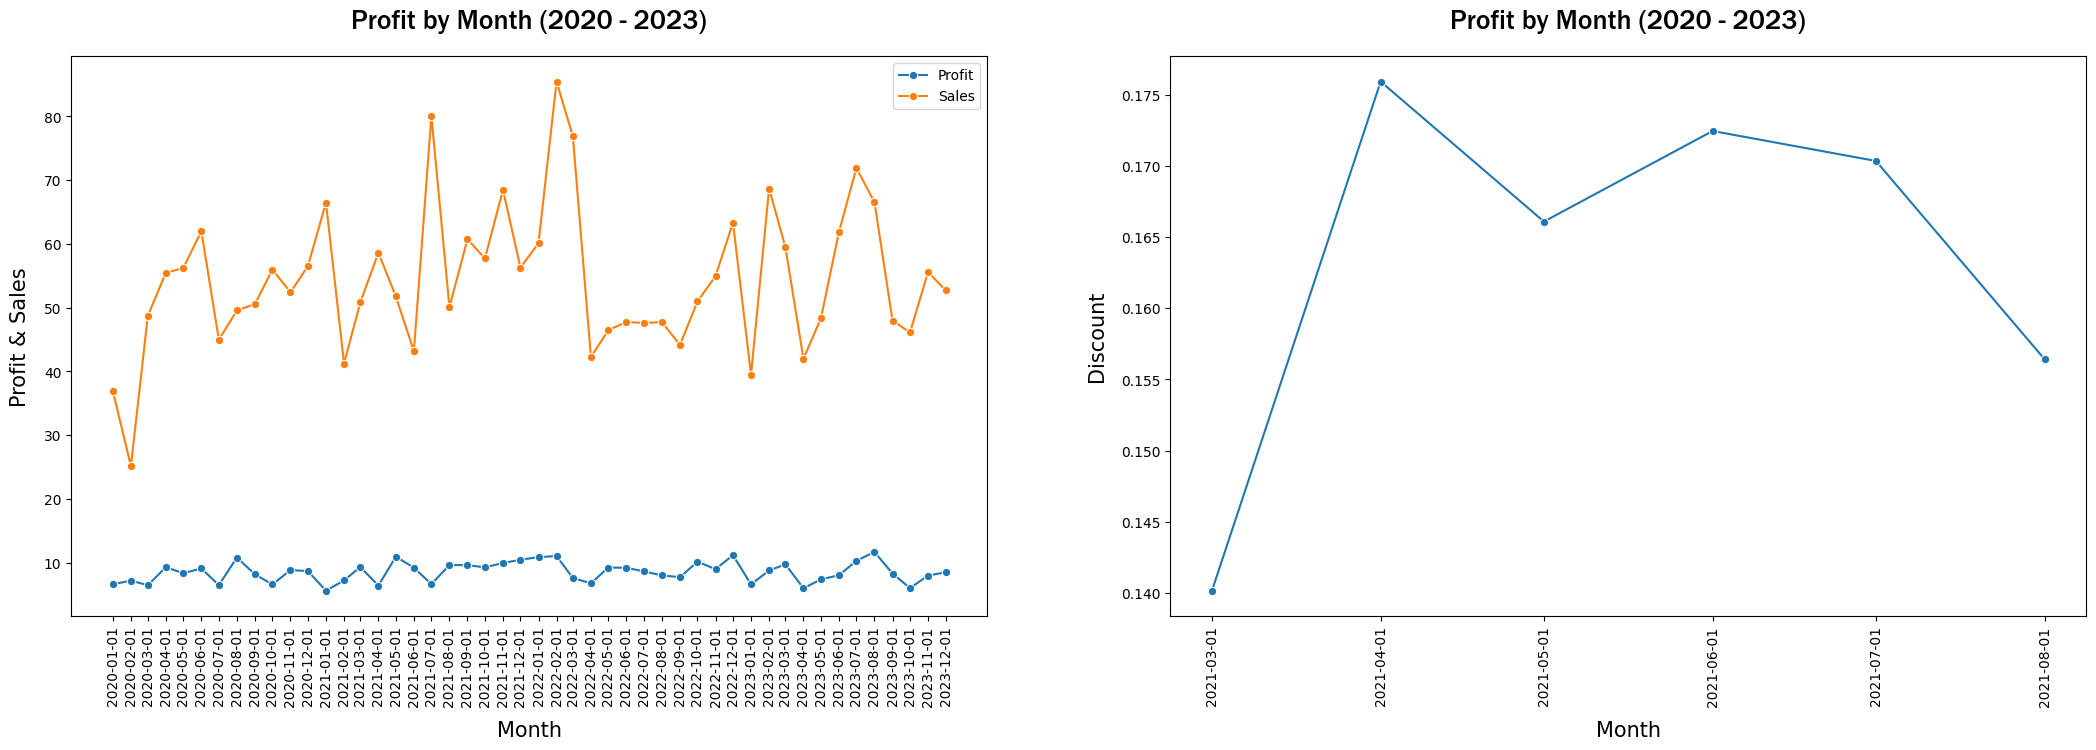

In [1388]:
plt.figure(figsize=(26,16))
plt.subplot(2,2,1)
sns.lineplot(
    data = df_time,
    x = 'Order Month',
    y = 'Profit',
    marker = 'o',
    label = 'Profit'
)

sns.lineplot(
    data = df_time,
    x = 'Order Month',
    y = 'Sales',
    ci = 0,
    marker = 'o',
    label = 'Sales'
)
plt.title('Profit by Month (2020 - 2023)', size= 20, pad= 20, fontweight = 'bold',fontname = 'Franklin Gothic Medium')
plt.xlabel('Month', size = 15, labelpad= 10)
plt.ylabel('Profit & Sales', size = 15, labelpad= 10)
plt.xticks(ticks= df_time['Order Month'], rotation= 90, size= 10)

plt.subplot(2,2,2)
sns.lineplot(
    data = df_decrease,
    x = 'Order Month',
    y = 'Discount',
    ci = 0,
    marker = 'o'
)
plt.title('Profit by Month (2020 - 2023)', size= 20, pad= 20, fontweight = 'bold',fontname = 'Franklin Gothic Medium')
plt.xlabel('Month', size = 15, labelpad= 10)
plt.ylabel('Discount', size = 15, labelpad= 10)
plt.xticks(ticks= df_decrease['Order Month'], rotation= 90, size= 10)

plt.show()

- Secara keseluruhan tren `Sales` dan `Profit` berdasarkan `Order Month` bergerak fluktuatif.
- Pada bulan April 2021 (2021-04-01) dan Juli 2021 (2021-07-01) `Sales` mengalami kenaikkan namun `Profit` turun.
- Terlihat bahwa pada bulan April 2021 dan Juli 2021 diberikan diskon yang lebih besar dari pada bulan lainnya sehingga mempengaruhi profit.
- Pada bulan Juni 2021 besaran rerata diskon yang diberikan lebih besar dari bulan Juli 2021 namun `Profit` yang diperoleh lebih besar.  

In [1337]:
df_order_total = df_clean[(df_clean['Order Month']=='2021-07-01')|(df_clean['Order Month']=='2021-06-01')].groupby(['Order Month'])[['Product']].count()

In [1338]:
df_order_freq = df_clean[(df_clean['Order Month']=='2021-07-01')|(df_clean['Order Month']=='2021-06-01')].groupby(['Order Month'])[['Discount']].value_counts()
df_order_freq = df_order_freq.reset_index().sort_values(['Order Month', 'Discount'])
df_order_freq = df_order_freq.rename(columns={"count":"Freq Discount"})

In [1339]:
df_order_freq=df_order_freq.merge(df_order_total, how='inner', on='Order Month').rename(columns={'Product':'Total'})
df_order_freq['Freq Discount(%)']=((df_order_freq['Freq Discount']/df_order_freq['Total'])*100).round(2)
df_order_freq

,Order Month,Discount,Freq Discount,Total,Freq Discount(%)
0,2021-06-01,0.00,58,138,42.03
1,2021-06-01,0.10,2,138,1.45
2,2021-06-01,0.20,61,138,44.20
3,2021-06-01,0.30,1,138,0.72
4,2021-06-01,0.50,2,138,1.45
5,2021-06-01,0.60,1,138,0.72
6,2021-06-01,0.70,9,138,6.52
7,2021-06-01,0.80,4,138,2.90
8,2021-07-01,0.00,64,140,45.71
9,2021-07-01,0.10,1,140,0.71


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\1261630577.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=df_order_freq, x='Order Month', y='Freq Discount(%)', hue='Discount', ci=0, palette='mako')
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated an

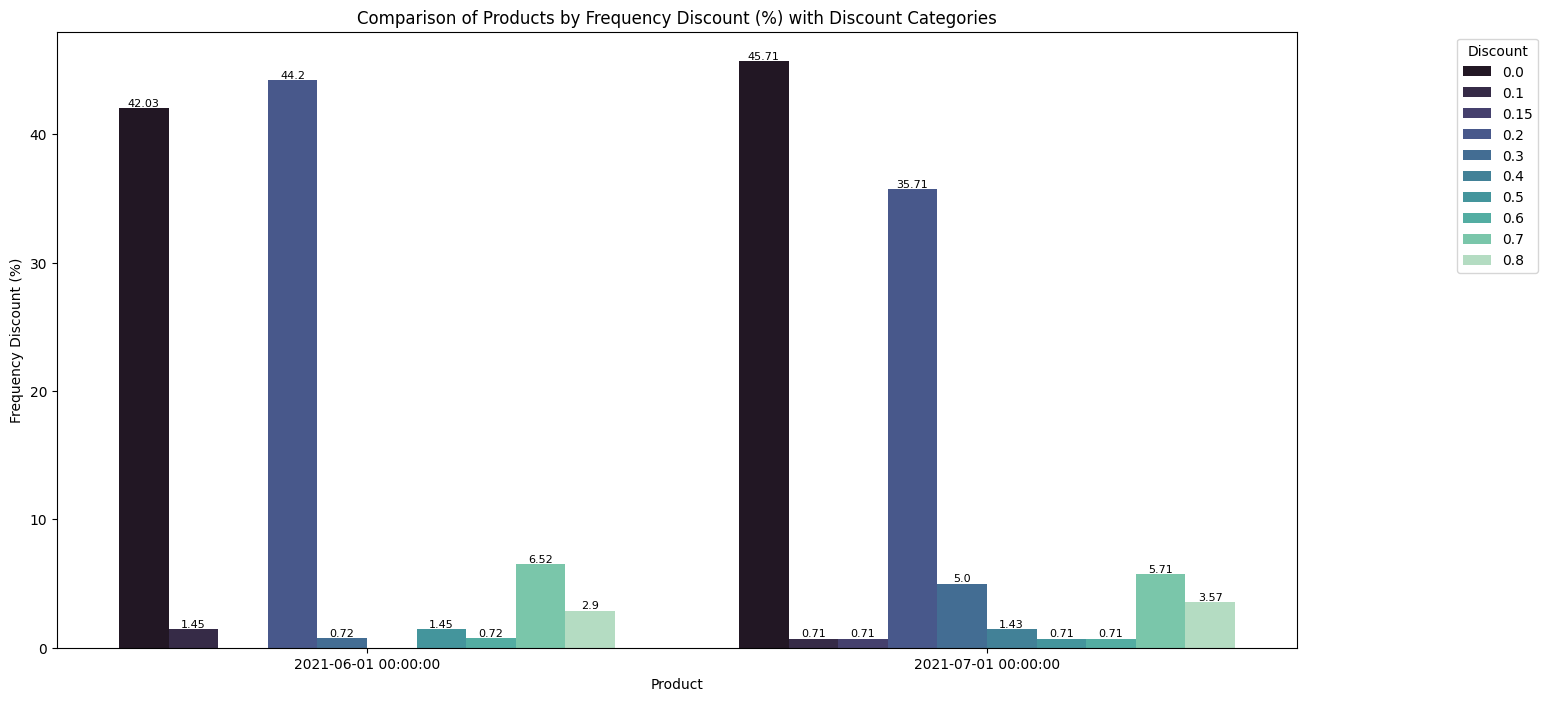

In [1340]:
plt.figure(figsize=(16,8))

ax = sns.barplot(data=df_order_freq, x='Order Month', y='Freq Discount(%)', hue='Discount', ci=0, palette='mako')
for i in range(10):
    container = ax.containers[i]
    ax.bar_label(container, [x.round(2) for x in container.datavalues], size= 8)
plt.xlabel('Product')
plt.ylabel('Frequency Discount (%)')
plt.title('Comparison of Products by Frequency Discount (%) with Discount Categories')
plt.legend(title='Discount', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

- Secara frequensi `Order Month` **Juni 2021** memberikan diskon pada besaran **0%** hingga **20%** sebanyak **87.68%**.
- Frequensi `Order Month` **Juli 2021** memberikan diskon pada besaran **0%** hingga **20%** sebanyak **82.84%**.

Berdasarkan persentase pemberian diskon tersebut dapat diketahui bahwa walaupun secara total sales Bulan **Juli 2021** lebih besar daripada **Juni 2021**. Pada bulan **Juli 2021** frequensi diskon dengan besaran diatas **30%** yang diberikan lebih sering sehingga `Profit` yang diperoleh lebih rendah.


#### **10. Top `Profit` berdasarkan `Subregion`**

Untuk memahami apakah ada faktor `Subregion` ataupun `Country` yang dapat mempengaruhi `Sales` dan `Profit`. Kita akan mencari tahu `Subregion` mana yang memiliki kinerja terbaik dan terburuk, lalu mencari tahu user *engagement* dari waktu ke waktu menggunakan cohort.

In [1341]:
df_subregion = df_clean.groupby('Subregion')[['Sales', 'Profit', 'Profit Margin', 'Discount']].aggregate({'Sales':'median', 'Profit':'median', 'Profit Margin':'median', 'Discount':'mean'}).reset_index()
df_subregion

,Subregion,Sales,Profit,Profit Margin,Discount
0,ANZ,37.296,0.69120,5.000,0.366919
1,APAC,69.930,20.08510,33.000,0.011409
2,EU,93.860,25.10085,29.000,0.000000
3,EU-EAST,63.824,8.61900,25.000,0.175802
4,EU-WEST,45.990,5.30630,18.000,0.213662
5,IND,70.080,18.76700,37.000,0.000000
6,JAPN,36.288,0.33360,1.250,0.370193
7,LATAM,57.498,6.53775,21.625,0.192401
8,MEA,48.280,7.62190,28.000,0.144192
9,NAMER,61.776,13.32000,31.250,0.071001


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\1172547910.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(data=df_subregion.sort_values('Sales'), y='Subregion', x='Sales', ci=0, palette='mako')
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

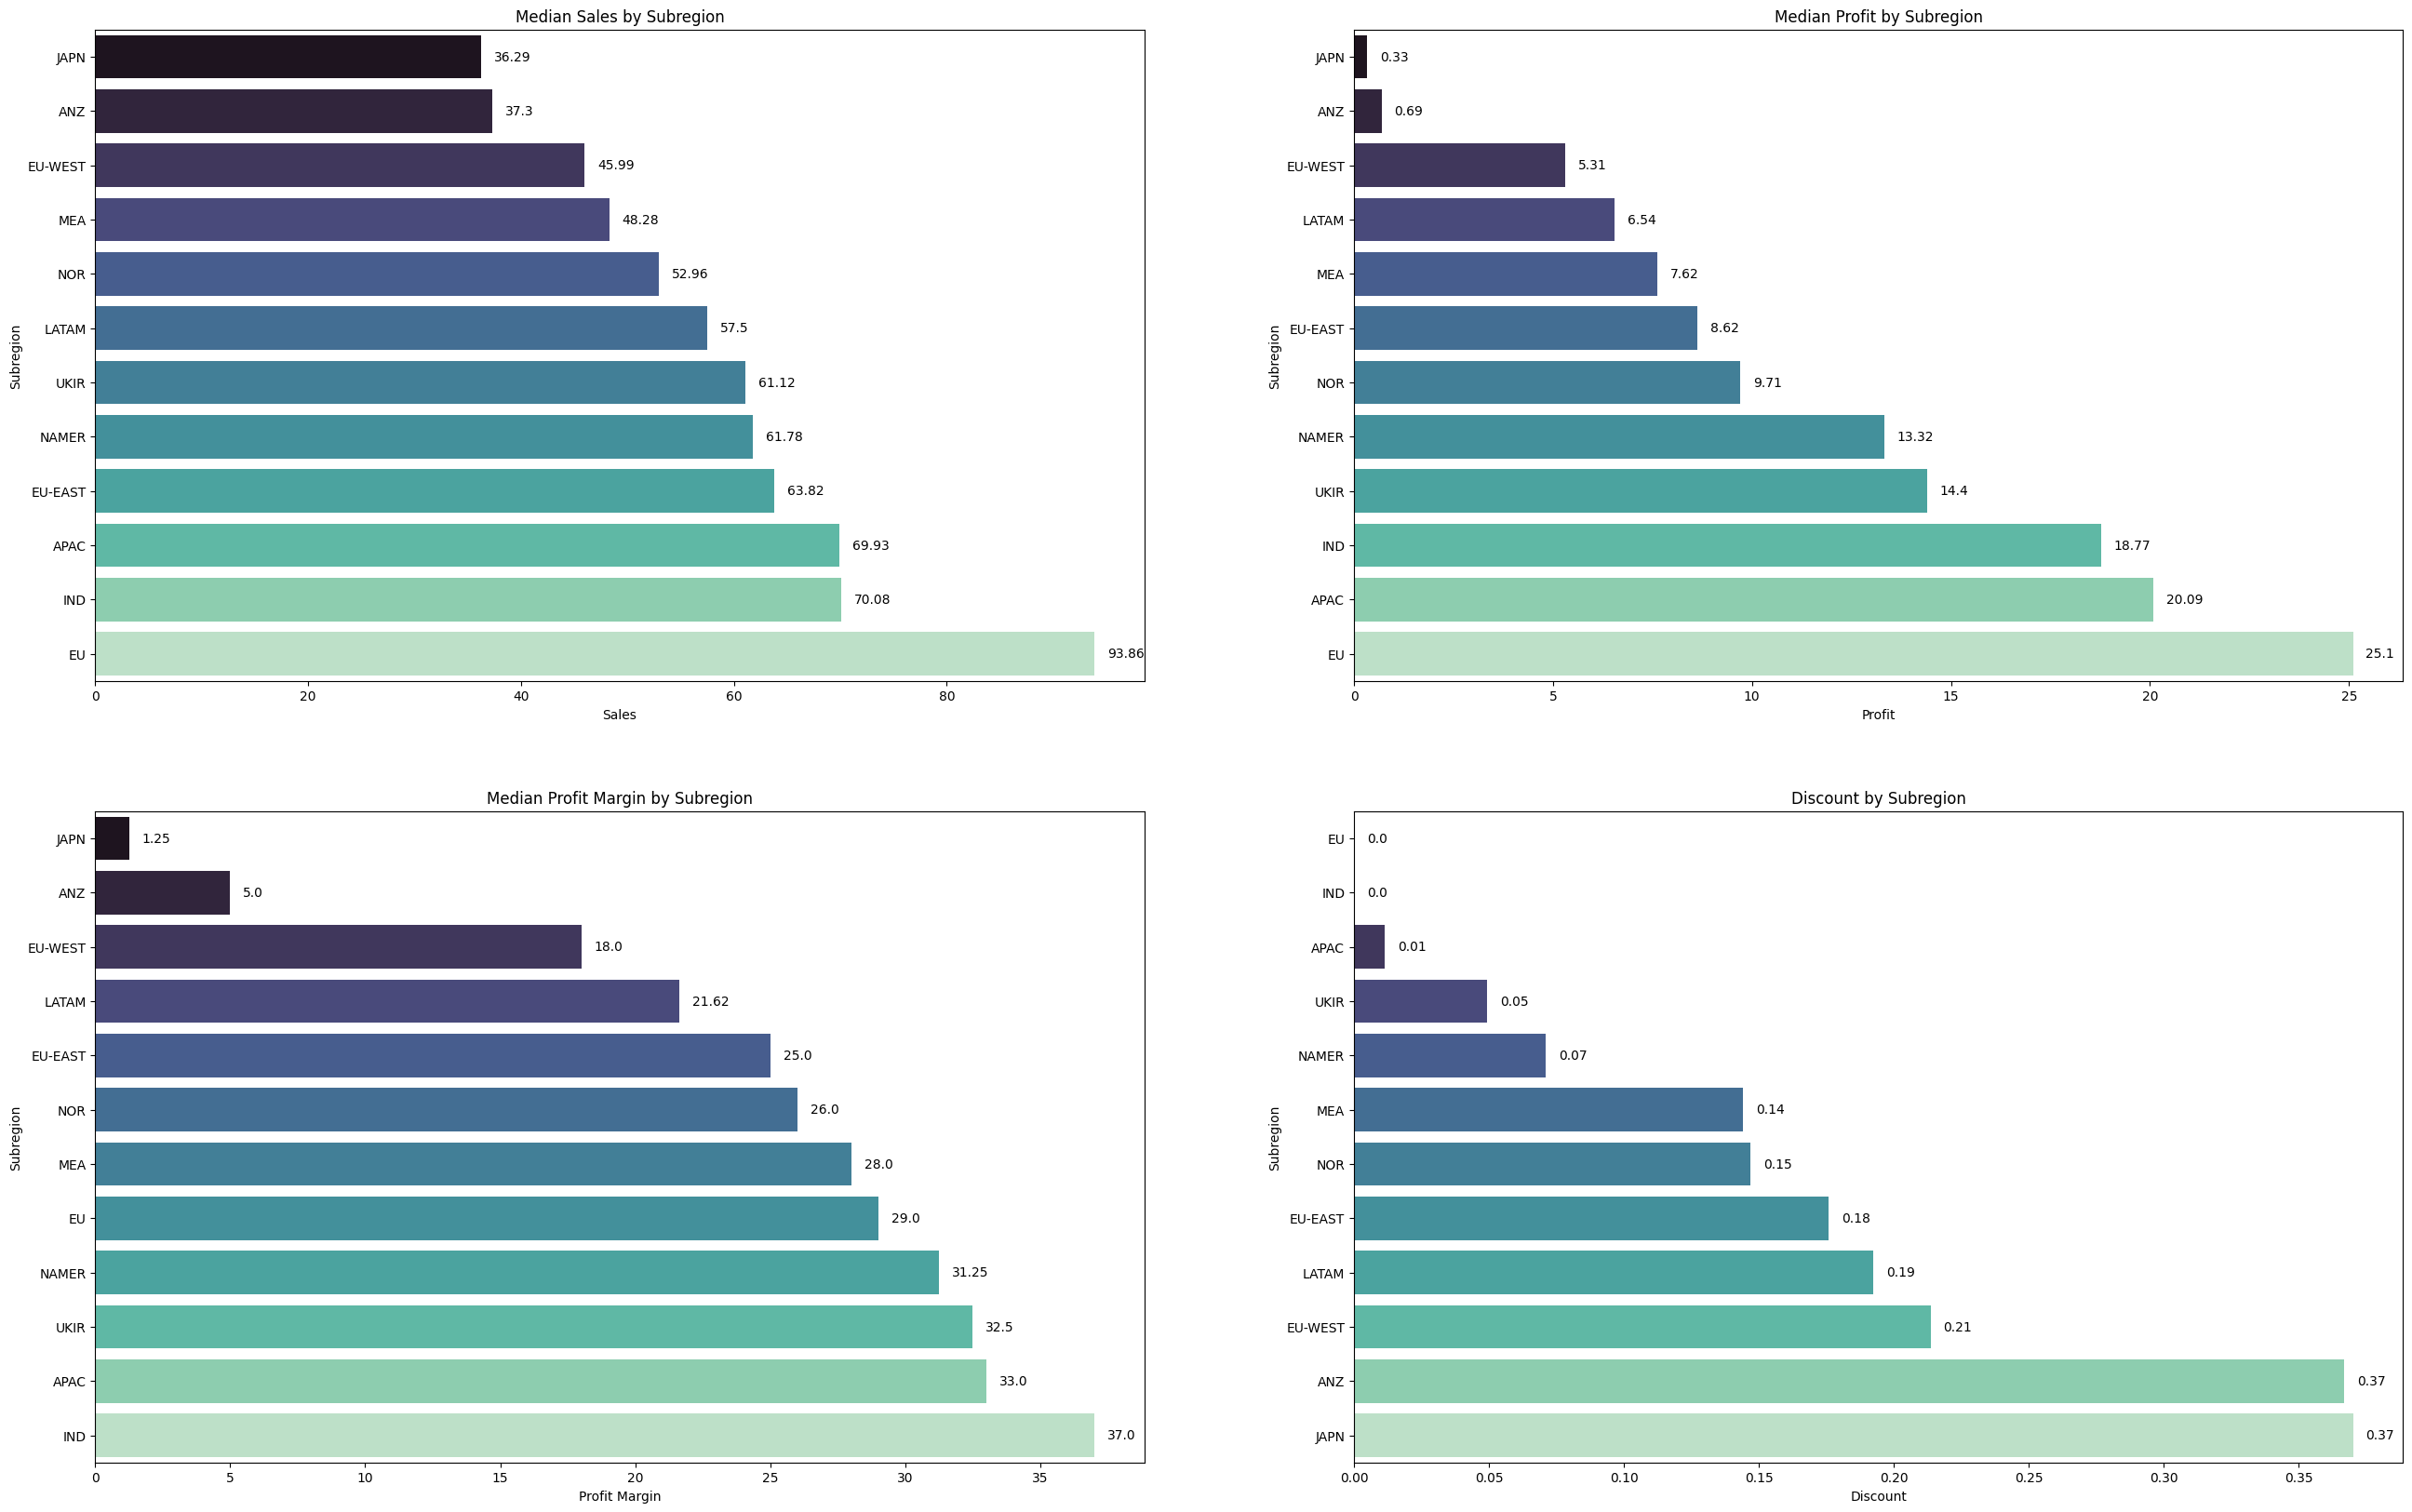

In [1342]:
plt.figure(figsize=(32,20))

plt.subplot(2,2,1)
ax = sns.barplot(data=df_subregion.sort_values('Sales'), y='Subregion', x='Sales', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 10)
plt.ylabel('Subregion')
plt.xlabel('Sales')
plt.title('Median Sales by Subregion')

plt.subplot(2,2,2)
ax = sns.barplot(data=df_subregion.sort_values('Profit'), y='Subregion', x='Profit', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 10)
plt.ylabel('Subregion')
plt.xlabel('Profit')
plt.title('Median Profit by Subregion')

plt.subplot(2,2,3)
ax = sns.barplot(data=df_subregion.sort_values('Profit Margin'), y='Subregion', x='Profit Margin', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 10)
plt.ylabel('Subregion')
plt.xlabel('Profit Margin')
plt.title('Median Profit Margin by Subregion')

plt.subplot(2,2,4)
ax = sns.barplot(data=df_subregion.sort_values('Discount'), y='Subregion', x='Discount', ci=0, palette='mako')
container = ax.containers[0]
ax.bar_label(container, [x.round(2) for x in container.datavalues], padding= 10)
plt.ylabel('Subregion')
plt.xlabel('Discount')
plt.title('Discount by Subregion')
plt.show()

Berdasarkan visualisasi diperoleh *insight* :
- Subregion JAPN, ANZ dan EU-WEST memiliki median `Sales` dan `Profit` terendah.
- Subregion IND, EU dan APAC memiliki median `Sales` dan `Profit` pada posisi top.
- Pada visualisasi `Discount` Subregion terlihat bahwa IND dan EU rata-rata memberikan `Discount` **0%**.
- Pada visualisasi `Discount` Subregion terlihat bahwa JAPN dan ANZ rata-rata memberikan `Discount` **0.37%**.

Kita akan membandingkan 2 Subregion ranking terbawah dan 2 Subregion tertinggi tersebut menggunakan cohort. Apakah pemberian `Discount` pada Subregion tertentu bertujuan untuk menaikkan jumlah konsumen.

#### **11. Membandingkan Cohort dari Subregion *ANZ, JAPN, EU-WEST* dan *IND, EU, APAC***

A. Membuat tabel cohort untuk `Subregion` *ANZ, JAPN dan EU-WEST*

- Membuat cohort date

In [1343]:
df_ANZ_JAPN = df_clean[(df_clean['Subregion']=='JAPN')|(df_clean['Subregion']=='ANZ')|(df_clean['Subregion']=='EU-WEST')]
df_ANZ_JAPN.head()

,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,-40.00,2021-10-01,2021-01-01
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,11.25,2021-10-01,2021-01-01
14,2021-11-22,Japan,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,68.8100,5,0.80,-123.8580,-180.00,2021-11-01,2021-01-01
15,2021-11-22,Japan,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,2.5440,3,0.80,-3.8160,-150.00,2021-11-01,2021-01-01
23,2023-07-17,France,EU-WEST,Costco Wholesale,1025,Retail,SMB,FinanceHub,71.3720,2,0.30,-1.0196,-1.43,2023-07-01,2023-01-01


In [1344]:
df_ANZ_JAPN['Cohort Month'] = df_ANZ_JAPN.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')
df_ANZ_JAPN.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\2073273712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANZ_JAPN['Cohort Month'] = df_ANZ_JAPN.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')


,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year,Cohort Month
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,-40.00,2021-10-01,2021-01-01,2020-09
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,11.25,2021-10-01,2021-01-01,2020-09
14,2021-11-22,Japan,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,68.8100,5,0.80,-123.8580,-180.00,2021-11-01,2021-01-01,2020-05
15,2021-11-22,Japan,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,2.5440,3,0.80,-3.8160,-150.00,2021-11-01,2021-01-01,2020-05
23,2023-07-17,France,EU-WEST,Costco Wholesale,1025,Retail,SMB,FinanceHub,71.3720,2,0.30,-1.0196,-1.43,2023-07-01,2023-01-01,2020-05


- Membuat kolom activity month

In [1345]:
df_ANZ_JAPN['Current Activity Month'] = df_ANZ_JAPN['Order Date'].dt.to_period('M')
df_ANZ_JAPN.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\405933713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ANZ_JAPN['Current Activity Month'] = df_ANZ_JAPN['Order Date'].dt.to_period('M')


,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year,Cohort Month,Current Activity Month
3,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,-40.00,2021-10-01,2021-01-01,2020-09,2021-10
4,2021-10-11,Germany,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,11.25,2021-10-01,2021-01-01,2020-09,2021-10
14,2021-11-22,Japan,JAPN,Pfizer,1074,Healthcare,Enterprise,OneView,68.8100,5,0.80,-123.8580,-180.00,2021-11-01,2021-01-01,2020-05,2021-11
15,2021-11-22,Japan,JAPN,Pfizer,1074,Healthcare,Enterprise,ContactMatcher,2.5440,3,0.80,-3.8160,-150.00,2021-11-01,2021-01-01,2020-05,2021-11
23,2023-07-17,France,EU-WEST,Costco Wholesale,1025,Retail,SMB,FinanceHub,71.3720,2,0.30,-1.0196,-1.43,2023-07-01,2023-01-01,2020-05,2023-07


- Membuat kolom Total Distinct Subject

In [1346]:
df_cohort_JAPN = df_ANZ_JAPN.groupby(['Cohort Month', 'Current Activity Month']).agg(n_customers=('Customer ID', 'nunique')).reset_index()
df_cohort_JAPN

,Cohort Month,Current Activity Month,n_customers
0,2020-01,2020-01,11
1,2020-01,2020-02,2
2,2020-01,2020-03,3
3,2020-01,2020-04,2
4,2020-01,2020-05,6
...,...,...,...
458,2022-05,2022-11,1
459,2022-05,2022-12,1
460,2022-05,2023-05,1
461,2022-05,2023-06,1


- Period Distance

In [1347]:
from operator import attrgetter

df_cohort_JAPN['Period Distance'] = (df_cohort_JAPN['Current Activity Month'] - df_cohort_JAPN['Cohort Month']).apply(attrgetter('n'))
df_cohort_JAPN

,Cohort Month,Current Activity Month,n_customers,Period Distance
0,2020-01,2020-01,11,0
1,2020-01,2020-02,2,1
2,2020-01,2020-03,3,2
3,2020-01,2020-04,2,3
4,2020-01,2020-05,6,4
...,...,...,...,...
458,2022-05,2022-11,1,6
459,2022-05,2022-12,1,7
460,2022-05,2023-05,1,12
461,2022-05,2023-06,1,13


In [1348]:
df_cohort_JAPN['Max Customers'] = df_cohort_JAPN.groupby('Cohort Month')['n_customers'].transform('max')

In [1349]:
df_cohort_JAPN['Percentage'] = (df_cohort_JAPN['n_customers']/df_cohort_JAPN['Max Customers'] * 100).round(2)

- Membuat Pivot Table

In [1350]:
df_cohort_pivot1 = df_cohort_JAPN.pivot_table(
    index = 'Cohort Month',
    columns = 'Period Distance',
    values = 'Percentage'
)

df_cohort_pivot1

Period Distance,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2020-01,100.0,18.18,27.27,18.18,54.55,54.55,9.09,9.09,27.27,18.18,...,54.55,45.45,45.45,45.45,36.36,36.36,54.55,27.27,45.45,63.64
2020-02,100.0,11.11,22.22,22.22,22.22,44.44,22.22,33.33,22.22,22.22,...,22.22,33.33,22.22,44.44,22.22,22.22,33.33,55.56,77.78,NaN
2020-03,100.0,17.65,23.53,17.65,11.76,41.18,41.18,29.41,52.94,47.06,...,23.53,35.29,35.29,29.41,47.06,52.94,52.94,64.71,NaN,NaN
2020-04,100.0,40.00,20.00,10.00,10.00,40.00,40.00,50.00,50.00,20.00,...,40.00,60.00,20.00,60.00,30.00,20.00,40.00,NaN,NaN,NaN
2020-05,100.0,14.29,14.29,14.29,42.86,NaN,71.43,71.43,14.29,14.29,...,28.57,42.86,71.43,42.86,28.57,85.71,NaN,NaN,NaN,NaN
2020-06,100.0,12.50,12.50,25.00,25.00,75.00,50.00,12.50,25.00,12.50,...,25.00,37.50,12.50,87.50,62.50,NaN,NaN,NaN,NaN,NaN
2020-07,100.0,25.00,37.50,NaN,50.00,12.50,12.50,NaN,37.50,25.00,...,50.00,50.00,50.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08,100.0,50.00,50.00,50.00,50.00,NaN,NaN,NaN,NaN,NaN,...,50.00,NaN,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,100.0,27.27,27.27,18.18,NaN,NaN,27.27,18.18,18.18,27.27,...,45.45,27.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


B. Membuat tabel cohort untuk `Subregion` *IND-EU-APAC*

In [1351]:
df_IND_EU = df_clean[(df_clean['Subregion']=='IND')|(df_clean['Subregion']=='EU')|(df_clean['Subregion']=='APAC')]
df_IND_EU.head()

,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
16,2020-11-11,Italy,EU,Toyota Motor,1087,Manufacturing,SMB,Marketing Suite - Gold,665.88,6,0.0,13.3176,2.0,2020-11-01,2020-01-01
47,2022-06-21,Philippines,APAC,Bank of America Corp.,1011,Finance,SMB,Data Smasher,45.00,3,0.0,4.9500,11.0,2022-06-01,2022-01-01
48,2022-06-21,Philippines,APAC,Bank of America Corp.,1011,Finance,SMB,Site Analytics,21.80,2,0.0,6.1040,28.0,2022-06-01,2022-01-01
49,2021-04-18,India,IND,Siemens,1043,Manufacturing,SMB,ContactMatcher,38.22,6,0.0,17.9634,47.0,2021-04-01,2021-01-01
50,2021-04-18,India,IND,Siemens,1043,Manufacturing,SMB,FinanceHub,75.18,6,0.0,35.3346,47.0,2021-04-01,2021-01-01


In [1352]:
df_IND_EU['Cohort Month'] = df_IND_EU.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')
df_IND_EU.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\2964014658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IND_EU['Cohort Month'] = df_IND_EU.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')


,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year,Cohort Month
16,2020-11-11,Italy,EU,Toyota Motor,1087,Manufacturing,SMB,Marketing Suite - Gold,665.88,6,0.0,13.3176,2.0,2020-11-01,2020-01-01,2020-11
47,2022-06-21,Philippines,APAC,Bank of America Corp.,1011,Finance,SMB,Data Smasher,45.00,3,0.0,4.9500,11.0,2022-06-01,2022-01-01,2020-10
48,2022-06-21,Philippines,APAC,Bank of America Corp.,1011,Finance,SMB,Site Analytics,21.80,2,0.0,6.1040,28.0,2022-06-01,2022-01-01,2020-10
49,2021-04-18,India,IND,Siemens,1043,Manufacturing,SMB,ContactMatcher,38.22,6,0.0,17.9634,47.0,2021-04-01,2021-01-01,2021-02
50,2021-04-18,India,IND,Siemens,1043,Manufacturing,SMB,FinanceHub,75.18,6,0.0,35.3346,47.0,2021-04-01,2021-01-01,2021-02


- Membuat kolom activity month

In [1353]:
df_IND_EU['Current Activity Month'] = df_IND_EU['Order Date'].dt.to_period('M')
df_IND_EU.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16892\2573119179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IND_EU['Current Activity Month'] = df_IND_EU['Order Date'].dt.to_period('M')


,Order Date,Country,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year,Cohort Month,Current Activity Month
16,2020-11-11,Italy,EU,Toyota Motor,1087,Manufacturing,SMB,Marketing Suite - Gold,665.88,6,0.0,13.3176,2.0,2020-11-01,2020-01-01,2020-11,2020-11
47,2022-06-21,Philippines,APAC,Bank of America Corp.,1011,Finance,SMB,Data Smasher,45.00,3,0.0,4.9500,11.0,2022-06-01,2022-01-01,2020-10,2022-06
48,2022-06-21,Philippines,APAC,Bank of America Corp.,1011,Finance,SMB,Site Analytics,21.80,2,0.0,6.1040,28.0,2022-06-01,2022-01-01,2020-10,2022-06
49,2021-04-18,India,IND,Siemens,1043,Manufacturing,SMB,ContactMatcher,38.22,6,0.0,17.9634,47.0,2021-04-01,2021-01-01,2021-02,2021-04
50,2021-04-18,India,IND,Siemens,1043,Manufacturing,SMB,FinanceHub,75.18,6,0.0,35.3346,47.0,2021-04-01,2021-01-01,2021-02,2021-04


- Membuat kolom Total Distinct Subject

In [1354]:
df_cohort_IND = df_IND_EU.groupby(['Cohort Month', 'Current Activity Month']).agg(n_customers=('Customer ID', 'nunique')).reset_index()
df_cohort_IND

,Cohort Month,Current Activity Month,n_customers
0,2020-01,2020-01,2
1,2020-01,2020-05,1
2,2020-01,2021-03,1
3,2020-01,2021-12,1
4,2020-01,2022-04,1
...,...,...,...
236,2023-07,2023-07,1
237,2023-08,2023-08,2
238,2023-08,2023-11,1
239,2023-08,2023-12,1


- Period Distance

In [1355]:
from operator import attrgetter

df_cohort_IND['Period Distance'] = (df_cohort_IND['Current Activity Month'] - df_cohort_IND['Cohort Month']).apply(attrgetter('n'))
df_cohort_IND

,Cohort Month,Current Activity Month,n_customers,Period Distance
0,2020-01,2020-01,2,0
1,2020-01,2020-05,1,4
2,2020-01,2021-03,1,14
3,2020-01,2021-12,1,23
4,2020-01,2022-04,1,27
...,...,...,...,...
236,2023-07,2023-07,1,0
237,2023-08,2023-08,2,0
238,2023-08,2023-11,1,3
239,2023-08,2023-12,1,4


In [1356]:
df_cohort_IND['Max Customers'] = df_cohort_IND.groupby('Cohort Month')['n_customers'].transform('max')

In [1357]:
df_cohort_IND['Percentage'] = (df_cohort_IND['n_customers']/df_cohort_IND['Max Customers'] * 100).round(2)

- Membuat Pivot Table

In [1358]:
df_cohort_pivot2 = df_cohort_IND.pivot_table(
    index = 'Cohort Month',
    columns = 'Period Distance',
    values = 'Percentage'
)

df_cohort_pivot2

Period Distance,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,41,42,43,44
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2020-01,100.0,NaN,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN,...,50.00,50.00,NaN,NaN,50.00,NaN,NaN,NaN,NaN,NaN
2020-02,100.0,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2020-03,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,100.00
2020-04,100.0,NaN,NaN,NaN,NaN,16.67,16.67,NaN,NaN,NaN,...,16.67,NaN,16.67,NaN,NaN,NaN,NaN,16.67,33.33,33.33
2020-05,100.0,16.67,NaN,NaN,16.67,NaN,16.67,16.67,NaN,NaN,...,16.67,NaN,NaN,NaN,33.33,NaN,16.67,16.67,16.67,NaN
2020-06,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN,NaN,NaN
2020-08,100.0,NaN,NaN,NaN,100.00,NaN,NaN,50.00,NaN,50.00,...,NaN,NaN,50.00,50.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09,100.0,NaN,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.00,NaN,20.00,NaN,20.00,40.0,NaN,NaN,NaN,NaN


In [1386]:
df_japn = df_ANZ_JAPN.groupby('Order Year').aggregate({'Customer ID':'count'}).reset_index().rename(columns={'Customer ID': 'Total Customer'})
df_ind = df_IND_EU.groupby('Order Year').aggregate({'Customer ID':'count'}).reset_index().rename(columns={'Customer ID': 'Total Customer'})
display(df_ind,df_japn)

,Order Year,Total Customer
0,2020-01-01,110
1,2021-01-01,181
2,2022-01-01,195
3,2023-01-01,220


,Order Year,Total Customer
0,2020-01-01,694
1,2021-01-01,662
2,2022-01-01,748
3,2023-01-01,1024


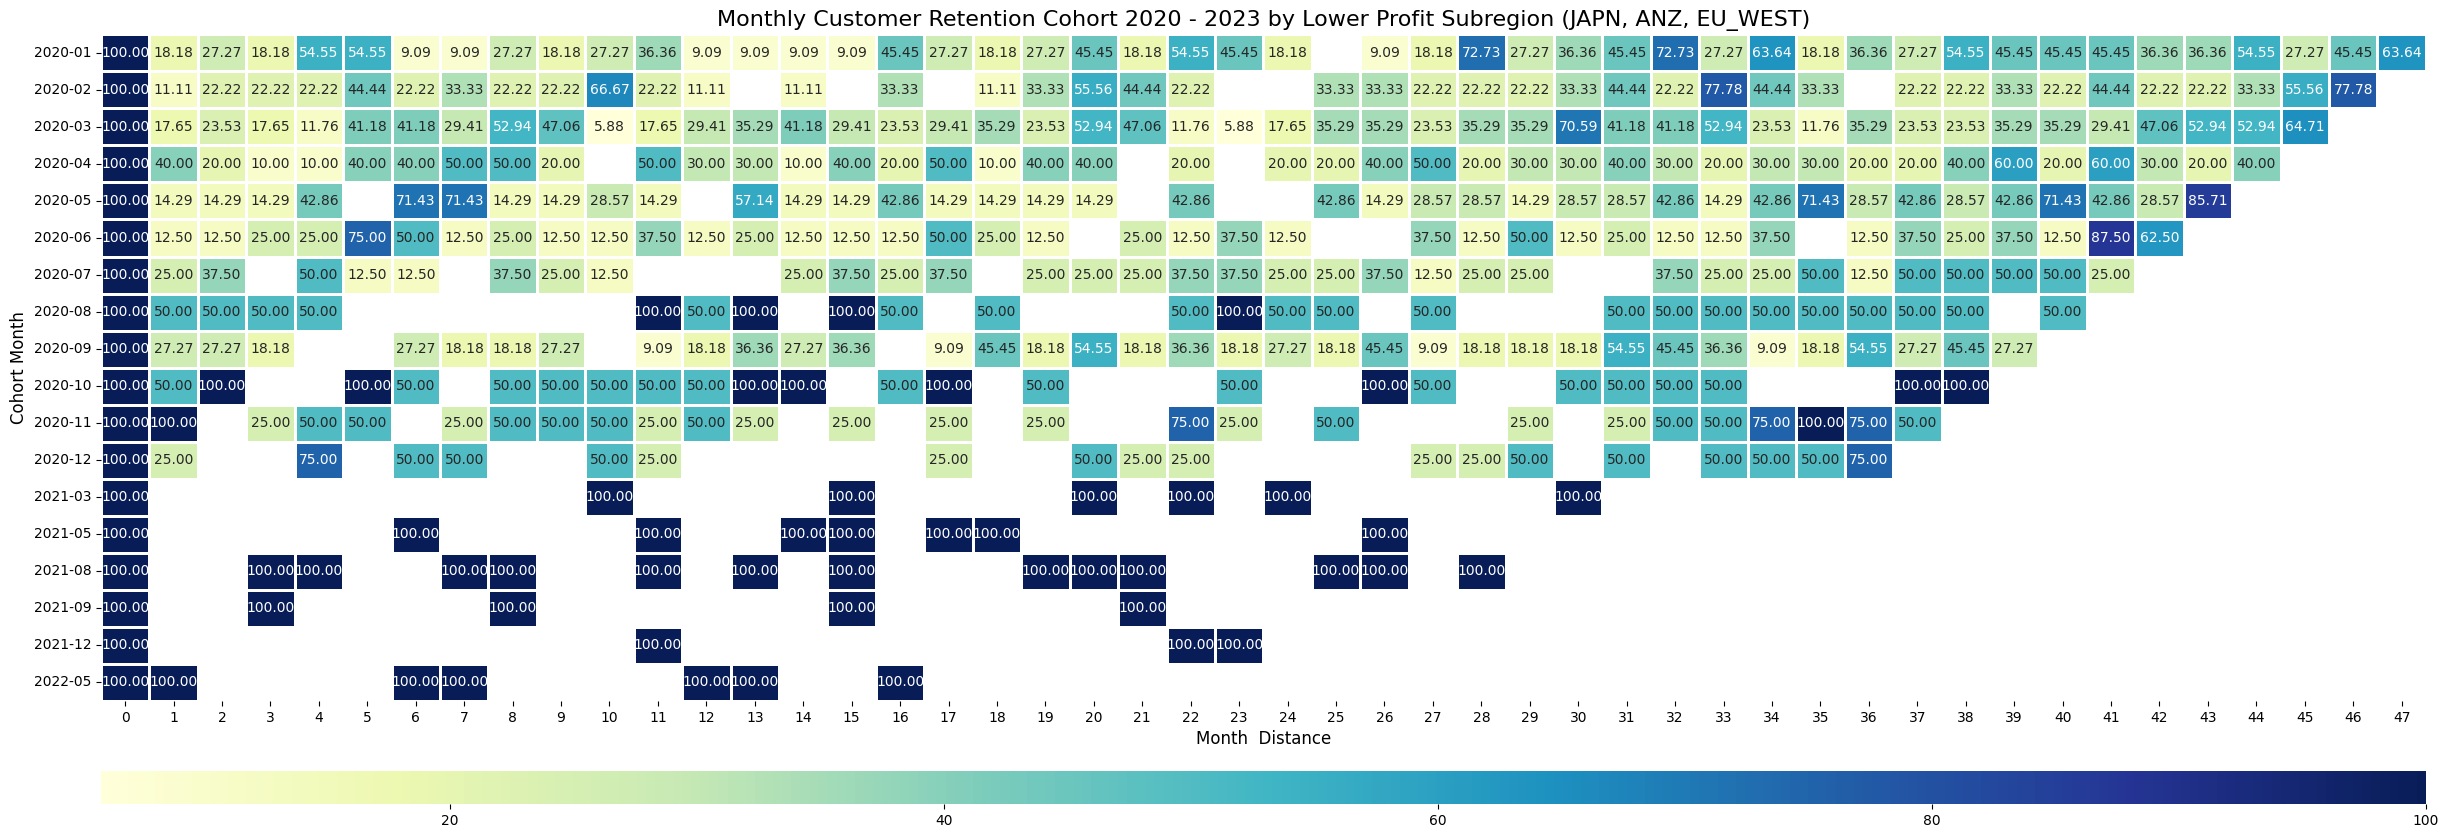

In [1359]:
grid = {
    'height_ratios' : (20,1),
    'hspace' : 0.2
}

fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(30,10), gridspec_kw=grid)

cohort_heatmap = sns.heatmap(
    data = df_cohort_pivot1,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    ax = ax_top,
    cbar_ax = ax_bottom, 
    cbar_kws = {'orientation':'horizontal'},
    linewidths=1
)

cohort_heatmap.set_title('Monthly Customer Retention Cohort 2020 - 2023 by Lower Profit Subregion (JAPN, ANZ, EU_WEST)', size=16)
cohort_heatmap.set_xlabel('Month  Distance', size=12)
cohort_heatmap.set_ylabel('Cohort Month', size=12)
plt.show()


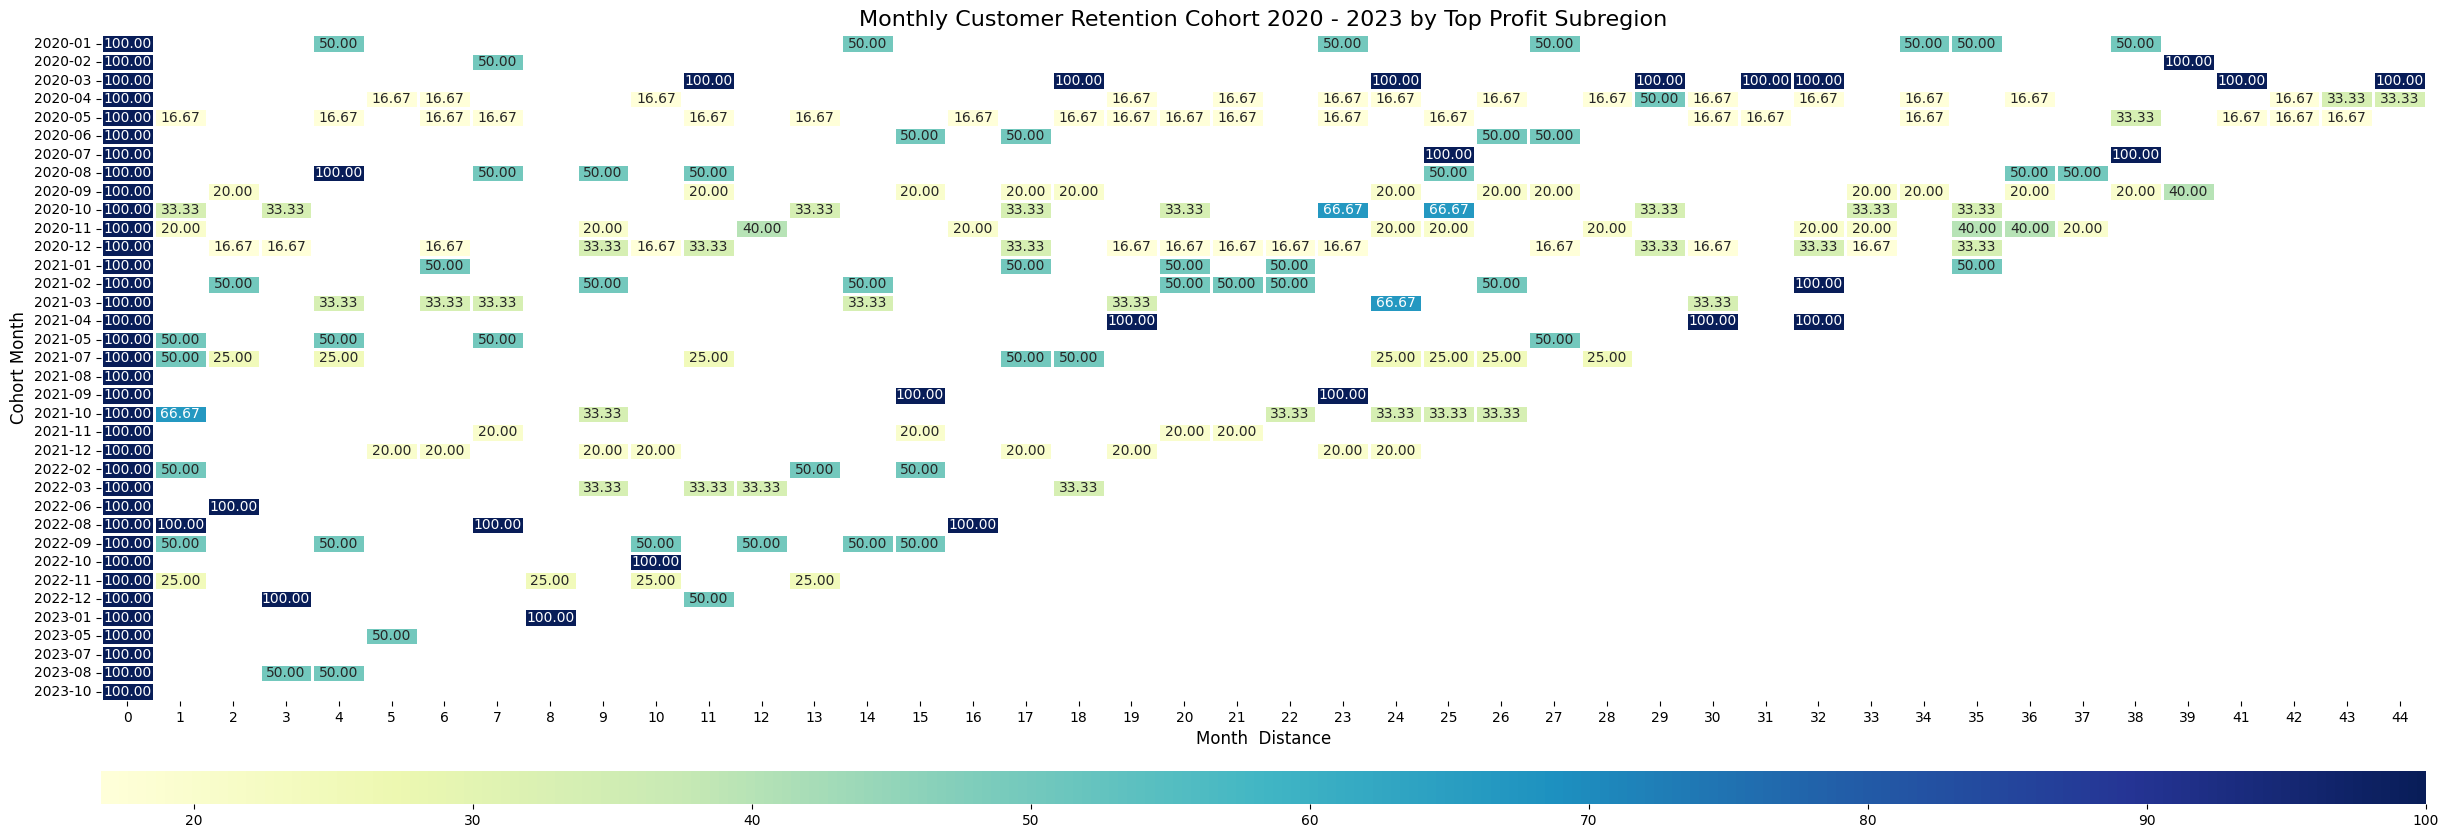

In [1360]:
grid = {
    'height_ratios' : (20,1),
    'hspace' : 0.2
}

fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, ncols=1, figsize=(30,10), gridspec_kw=grid)

cohort_heatmap = sns.heatmap(
    data = df_cohort_pivot2,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    ax = ax_top,
    cbar_ax = ax_bottom,
    cbar_kws = {'orientation':'horizontal'}, 
    linewidths=1
)

cohort_heatmap.set_title('Monthly Customer Retention Cohort 2020 - 2023 by Top Profit Subregion', size=16)
cohort_heatmap.set_xlabel('Month  Distance', size=12)
cohort_heatmap.set_ylabel('Cohort Month', size=12)

plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

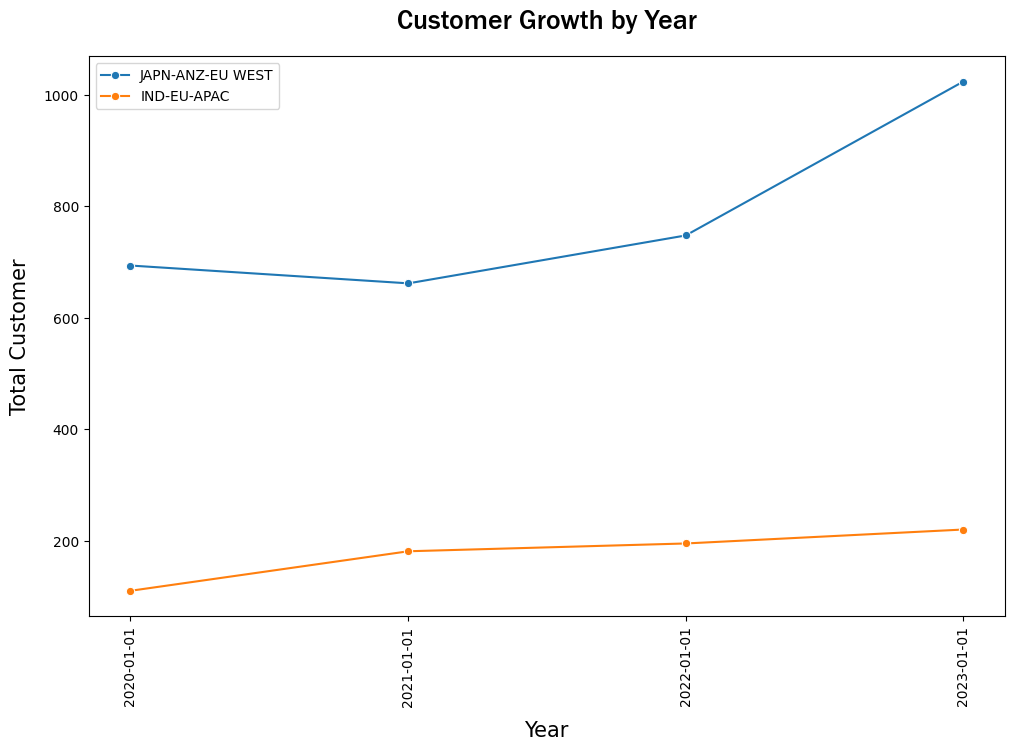

In [1389]:
plt.figure(figsize=(26,16))
plt.subplot(2,2,1)
sns.lineplot(
    data = df_japn,
    x = 'Order Year',
    y = 'Total Customer',
    marker = 'o',
    label = 'JAPN-ANZ-EU WEST'
)

sns.lineplot(
    data = df_ind,
    x = 'Order Year',
    y = 'Total Customer',
    marker = 'o',
    label = 'IND-EU-APAC'
)
plt.title('Customer Growth by Year', size= 20, pad= 20, fontweight = 'bold',fontname = 'Franklin Gothic Medium')
plt.xlabel('Year', size = 15, labelpad= 10)
plt.ylabel('Total Customer', size = 15, labelpad= 10)
plt.xticks(ticks= df_japn['Order Year'], rotation= 90, size= 10)

plt.show()

Dari analisis cohort diperoleh fakta :

1. `Subregion` *ANZ, JAPN dan EU-WEST*
- Secara horizontal (kiri ke kanan), untuk setiap cohort, persentase customer dari bulan ke bulan cukup fluktuatif.
- Cohort bulan Januari 2020 (2020-01) adalah cohort yang paling loyal (retain).
- Secara vertikal (atas ke bawah), untuk setiap cohort, persentase customer dari bulan ke bulan cukup fluktuatif.
- Terdapat persentase customer 100%. Pada cohort month tertentu terdapat hanya 1 pelanggan baru. Hal tersebut tidak bisa membuktikan bahwa angka 100% menandakan cohort month tertentu paling royal pada month distance -n.
2. `Subregion` *IND, EU dan APAC*
- Baik secara horizontal dan vertikal setiap cohort month bergerak fluktuatif.
- Pada setiap Month Distance period secara vertikal dan horizonal tidak terdapa activitas pelanggan.

Summary :
- Secara analisis cohort customer pada `Subregion` lower sales (*ANZ, JAPN dan EU-WEST*) lebih retain dibandingkan `Subregion` top sales (IND, EU dan APAC).
- Pada analisis sebelumnya diperoleh fakta bahwa `Subregion` lower sales (*ANZ, JAPN dan EU-WEST*) lebih sering memberikan diskon.
- Jika dibandingkan dengan `Subregion` *IND, EU dan APAC*, `Subregion` lower sales (*ANZ, JAPN dan EU-WEST*) memiliki *user engagement* yang lebih baik. Artinya pemberian diskon yang lebih sering mengakibatkan adanya peningkatan pengguna layanan.
- Pada `Subregion` lower sales (*ANZ, JAPN dan EU-WEST*) pemberian diskon sepertinya dilakukan dengan tujuan untuk meningkatkan sales.
- Pada linechart terlihat bahwa user engagement* `Subregion` lower sales memiliki jumlah kenaikan pelanggan yang lebih signifikan pada tahun 2022-2023. Artinya pemberian diskon memberikan *impact* terhadap kenaikan jumlah pelanggan.

# **Kesimpulan dan Rekomendasi**
## **Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan:

**Segment dan Industry**

1. Sebanyak **51.9%** pelanggan berasal dari `Segment` *SMB* (*Small to Medium Business*), Artinya lebih dari setengah konsumen berasal dari perusahaan dengan skala bisnis kurang dari 1000 karyawan.
2. `Segment` *SMB (Small to Medium Business)* memberikan kinerja `Sales` dan `Profit` tertinggi, yaitu **$ 134,119.2092**.
3. Profit yang diberikan dari setiap sektor `Industry` tidak berbeda signifikan.

**Product**

1. Top `Sales` produk adalah ContactMatcher, yaitu  **$ 410,378.26**.
2. Top `Profit` produk adalah Alchemy, yaitu  **$ 55,617.8249**.
3. `Product` dengan median kinerja `Profit Margin` rendah (kurang dari 10%) berdasarkan `Segment`, antara lain:
    * *Marketing Suite*
    * *Marketing Suite - Gold*
    * *Big OI Database*
    * *Site Analytics*

**Discount**

1. Terdapat korelasi yang Moderate (**-0.61**) antara `Discount` dengan `Profit` pada produk *Marketing Suite*.
2. *Site Analytics* memiliki kinerja `Sales` yang baik tetapi `Profit Margin` rendah. Hal ini disebabkan oleh:
    - 65.02 % penjualan dikenakan diskon diatas 20%.
    - 34.98% penjualan tidak dikenakan diskon (0%).
3. Frekuensi pemberian profit pada tiap kelompok memiliki pola yang berbeda-beda. Kelompok lower dan midle lebih sering memberikan diskon dengan besaran lebih dari 20%. Sedangkan pada kelompok top margin lebih jarang memberikan diskon (0%).
4. Profit pada `Product`:
    - Kerugian pada produk *Marketing Suite* terjadi ketika pemberian diskon lebih dari 20%.
    - Kerugian pada produk *ContactMatcher* terjadi ketika pemberian diskon lebih dari 30%.
    - Pada produk *Alchemy* maksimal diskon yang diberikan 40% dan pada besaran diskon tersebut median `Profit` masih bernilai positif.
5. Diskon berdasarkan Subregion 
    - Subregion JAPN, ANZ dan EU-WEST memiliki median `Sales` dan `Profit` terendah.
    - Subregion IND, EU dan APAC memiliki median `Sales` dan `Profit` pada posisi teratas.
6. Perbandingan cohort antara lower sales `Subregion`
    - Secara analisis cohort customer pada `Subergion` *lower sales* (*ANZ, JAPN dan EU-WEST*) lebih retain dibandingkan `Subergion` top sales (IND, EU dan APAC).
    - Banyaknya frekuensi pemberian diskon pada Subregion*lower sales* (*ANZ, JAPN dan EU-WEST*)  mengakibatkan peningkatan jumlah pembelian setiap tahunnya.

## **Rekomendasi**
1. Fokus Pada Segmen SMB: 
Karena Segment SMB memiliki total Sales dan Profit tertinggi, disarankan untuk mengalokasikan sumber daya dan upaya pemasaran yang lebih baik untuk meningkatkan pelanggan dari segmen ini. Upaya yang dilakukan bisa mencakup kampanye pemasaran dan peningkatan layanan yang sesuai dengan kebutuhan SMB.

2. Optimalkan Strategi Produk: 
Untuk produk dengan Profit Margin rendah, seperti Marketing Suite, perusahaan perlu meninjau ulang strategi harga dan pemberian diskon. Mungkin ada kebutuhan untuk mengurangi diskon atau meningkatkan nilai produk untuk meningkatkan profitabilitasnya. Seperti menerapkan besaran diskon maksimal diangka 20% dan menaikkan harga minimum dari produk tersebut.

3. Perhatikan Subregion Performa Rendah: 
Subregion seperti JAPN, ANZ, dan EU-WEST memiliki sales dan profit yang lebih rendah. Walaupun pemberian diskon pada subregion ini bertujuan untuk meningkatkan engagement. Perlu dipertimbangkan untuk menetapkan besaran diskon yang terukur. Seperti pemberian diskon diatas 20% hanya untuk pengguna baru ataupun pemberian diskon pada periode tertentu.

4. Perbaiki Retensi Pelanggan: 
Subregion "lower sales" memiliki retention yang lebih baik. Ini menunjukkan potensi untuk memfokuskan upaya retensi pelanggan pada setiap wilayah. Salah satunya dengan memberikan layanan tambahan, program loyalitas, atau dukungan pelanggan yang lebih baik.

5. Analisis Produk dengan Diskon Tinggi: 
Pada beberapa produk akan mulai mengalami kerugian jika memberikan diskon diatas 20% ataupun 30%.<br>
Kita tidak perlu menghapuskan diskon, salah satu strategi yang bisa diterapkan antara lain :
    - Lakukan analisis pada setiap produk, pada besaran berapa produk mulai rugi.
    - Setelah diketahui besaran diskon maksimal produk mulai rugi, tingkatkan frekuensi pemberian diskon dibawah besaran tersebut.
    - Sebagai contoh ContactMatcher mulai merugi pada besaran diskon 30%. Turunkan besaran diskon dibawah nilai tersebut dan tingkatkan frekuensi pemberian diskon pada rentang tersebut.
    - Perhatikan harga minimumnya dan cost dari setiap produk lalu naikkan harga minimumnya.
Rekomendasi ini dapat membantu perusahaan meningkatkan profitabilitasnya, mengoptimalkan strategi pemasaran, dan memfokuskan upaya pada segmen dan wilayah yang memiliki potensi pertumbuhan yang lebih besar.





